In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn import metrics


In [2]:
warnings.simplefilter (action='ignore')
#plt.style.use('seaborn')


In [3]:
#definign data set the train part

Data = pd.read_csv('mobileprice_train.csv', encoding=('unicode-escape'))
Data

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [4]:
#definign data set the test part

Data1 = pd.read_csv('mobileprice_test.csv', encoding=('unicode-escape'))
Data1

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [5]:
Df = pd.DataFrame(Data)
Df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [6]:
#data cleaning phase
Df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [7]:
Df.iloc[:, 1:]


blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0        0          2.2         0   1       0           7    0.6        188   
1        1          0.5         1   0       1          53    0.7        136   
2        1          0.5         1   2       1          41    0.9        145   
3        1          2.5         0   0       0          10    0.8        131   
4        1          1.2         0  13       1          44    0.6        141   
...    ...          ...       ...  ..     ...         ...    ...        ...   
1995     1          0.5         1   0       1           2    0.8        106   
1996     1          2.6         1   0       0          39    0.2        187   
1997     0          0.9         1   1       1          36    0.7        108   
1998     0          0.9         0   4       1          46    0.1        145   
1999     1          2.0         1   5       1          45    0.9        168   

      n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0           2   2         20       756  2549     9     7         19        0   
1           3   6        905      1988  2631    17     3          7        1   
2           5   6       1263      1716  2603    11     2          9        1   
3           6   9       1216      1786  2769    16     8         11        1   
4           2  14       1208      1212  1411     8     2         15        1   
...       ...  ..        ...       ...   ...   ...   ...        ...      ...   
1995        6  14       1222      1890   668    13     4         19        1   
1996        4   3        915      1965  2032    11    10         16        1   
1997        8   3        868      1632  3057     9     1          5        1   
1998        5   5        336       670   869    18    10         19        1   
1999        6  16        483       754  3919    19     4          2        1   

      touch_screen  wifi  price_range  
0                0     1            1  
1                1     0            2  
2                1     0            2  
3                0     0            2  
4                1     0            1  
...            ...   ...          ...  
1995             1     0            0  
1996             1     1            2  
1997             1     0            3  
1998             1     1            0  
1999             1     1            3  

[2000 rows x 20 columns]

In [8]:
Df.describe(include='all')

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [9]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
#removing the value of 0 which are not acceptble in data set

cols = ['battery_power', 'clock_speed', 'fc', 'm_dep', 'mobile_wt', 'px_height', 'px_width']

for col in cols:
    Df = Df[Df[col]!= 0]
Df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
2               563     1          0.5         1   2       1          41   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
6              1821     0          1.7         0   4       1          10   
...             ...   ...          ...       ...  ..     ...         ...   
1992            674     1          2.9         1   1       0          21   
1994            858     0          2.2         0   1       0          50   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
2       0.9        145        5  ...       1263      1716  2603    11     2   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
6       0.8        139        8  ...        381      1018  3220    13     8   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1992    0.2        198        3  ...        576      1809  1180     6     3   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
2             9        1             1     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
6            18        1             0     1            3  
...         ...      ...           ...   ...          ...  
1992          4        1             1     1            0  
1994          3        1             1     0            3  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1524 rows x 21 columns]

In [11]:
#EDA phase

Df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [12]:
Df.dropna()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
2               563     1          0.5         1   2       1          41   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
6              1821     0          1.7         0   4       1          10   
...             ...   ...          ...       ...  ..     ...         ...   
1992            674     1          2.9         1   1       0          21   
1994            858     0          2.2         0   1       0          50   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
2       0.9        145        5  ...       1263      1716  2603    11     2   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
6       0.8        139        8  ...        381      1018  3220    13     8   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1992    0.2        198        3  ...        576      1809  1180     6     3   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
2             9        1             1     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
6            18        1             0     1            3  
...         ...      ...           ...   ...          ...  
1992          4        1             1     1            0  
1994          3        1             1     0            3  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1524 rows x 21 columns]

In [13]:
#Definig a unique values for categorical features
print (pd.unique(Df['blue']))
print (pd.unique(Df['dual_sim']))
print (pd.unique(Df['four_g']))
print (pd.unique(Df['n_cores']))
print (pd.unique(Df['three_g']))
print (pd.unique(Df['touch_screen']))
print (pd.unique(Df['wifi']))
print (pd.unique(Df['price_range']))




[0 1]
[0 1]
[0 1]
[2 5 1 8 4 3 7 6]
[0 1]
[0 1]
[1 0]
[1 2 3 0]


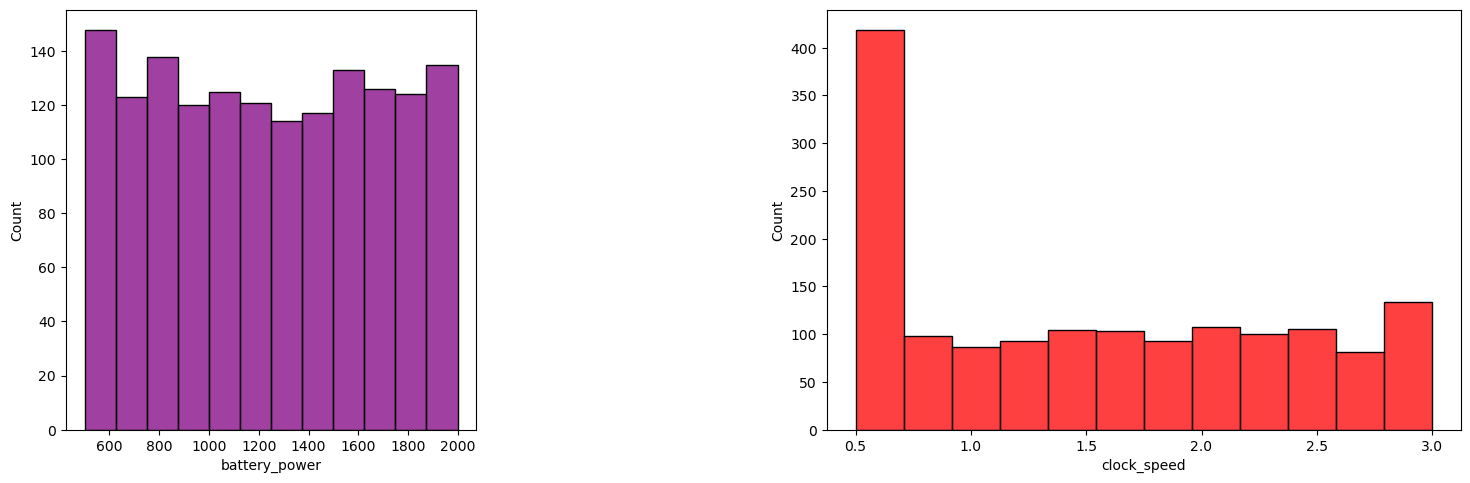

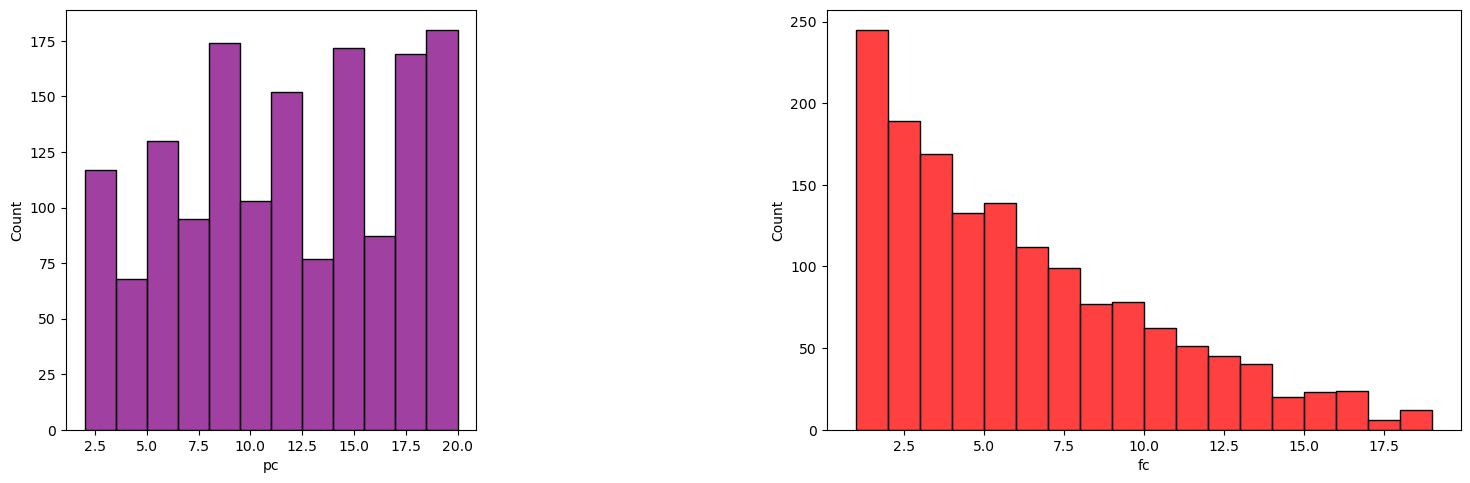

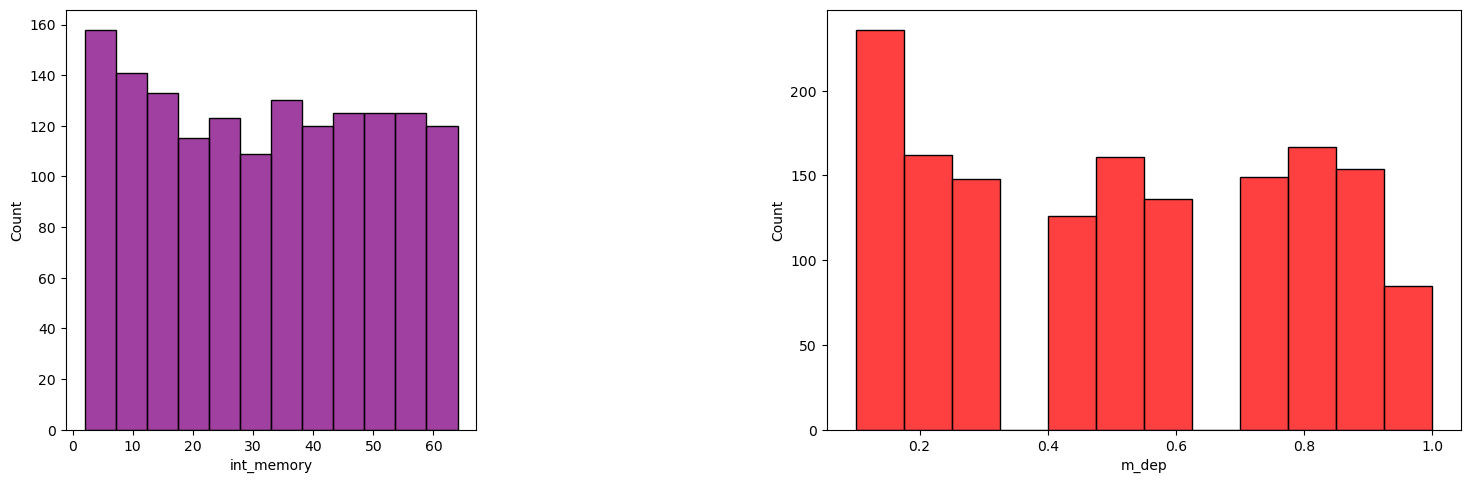

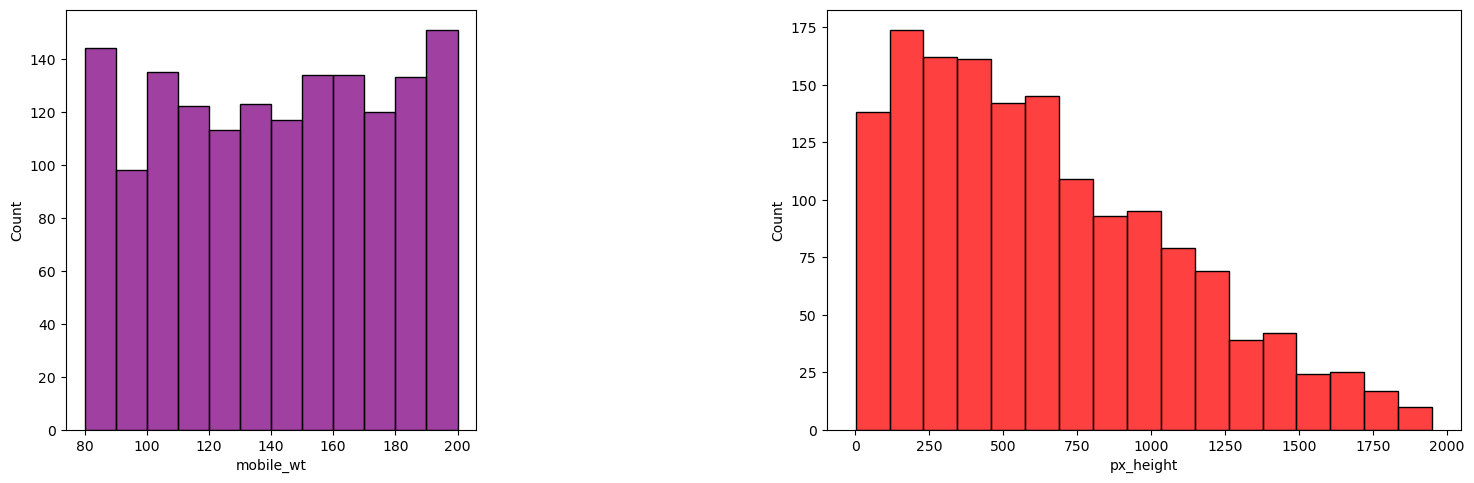

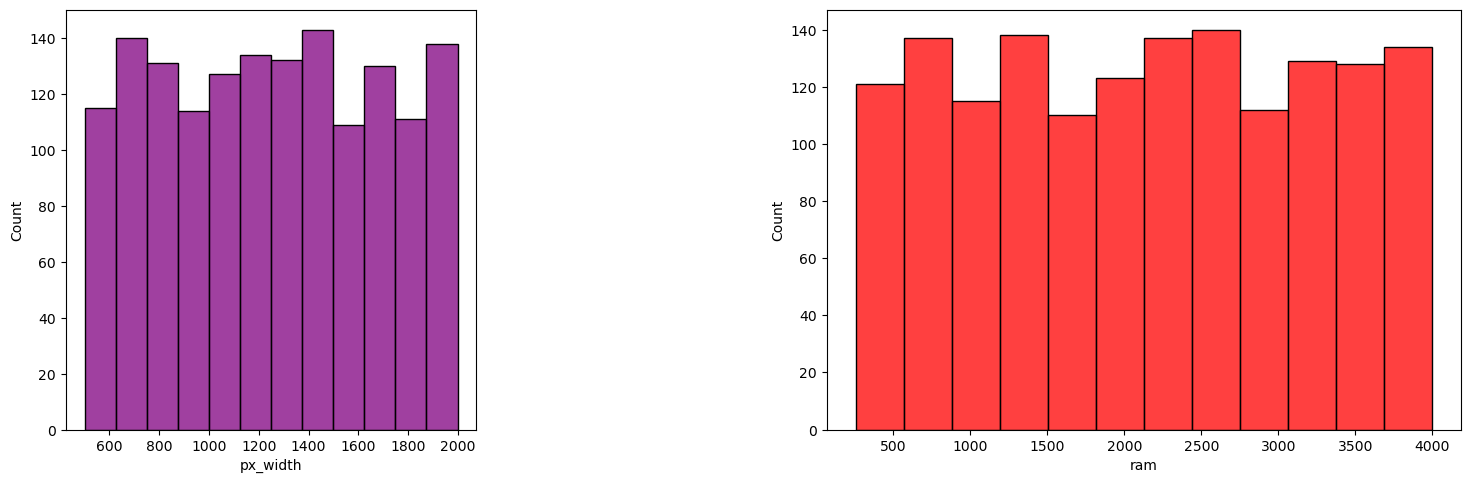

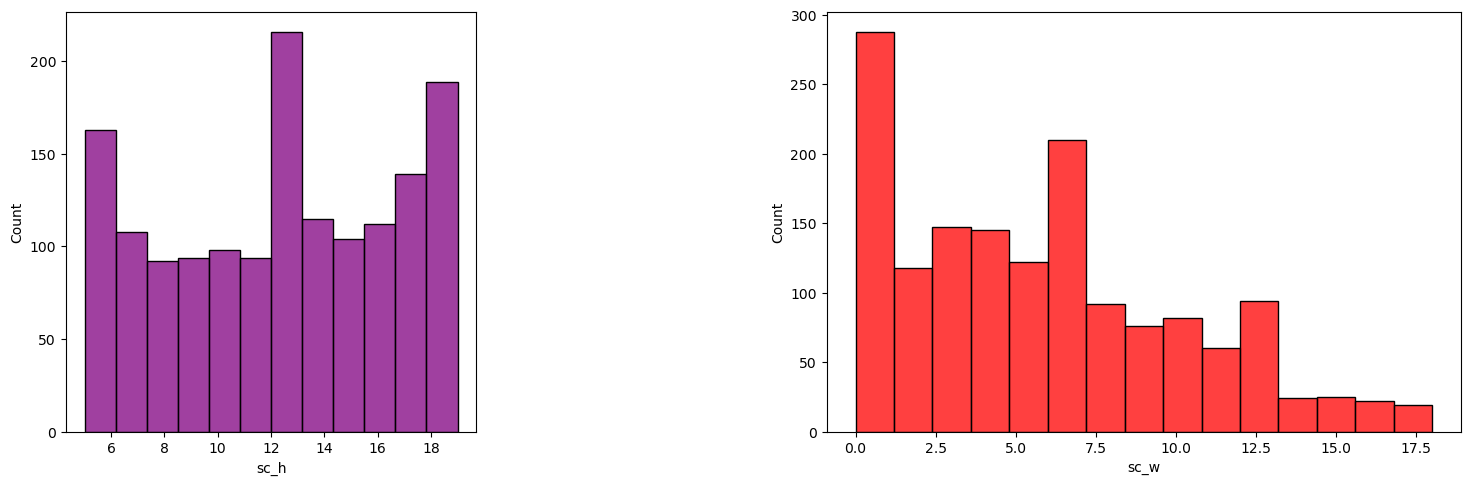

In [14]:
#PLotting for numerical
Numerical = ['battery_power','clock_speed','pc' ,'fc','int_memory', 'm_dep','mobile_wt','px_height','px_width','ram' ,'sc_h', 'sc_w'
             , 'talk_time']
i = 0
while i <12:
    fig = plt.figure(figsize=(18, 12))
    plt.subplot(2,3,1)
    sns.histplot(x =Numerical [i], color='purple', data= Df)
    i = i+1
    plt.subplot(2,2,2)
    sns.histplot(x =Numerical [i], color='red', data= Df)
    i = i +1
    plt.show()
    

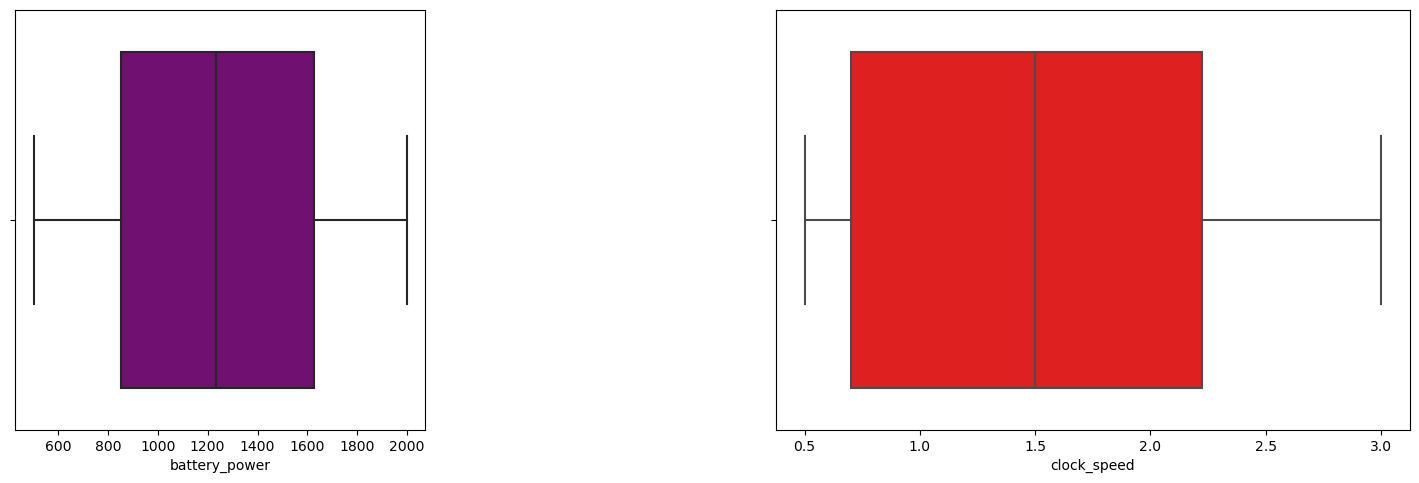

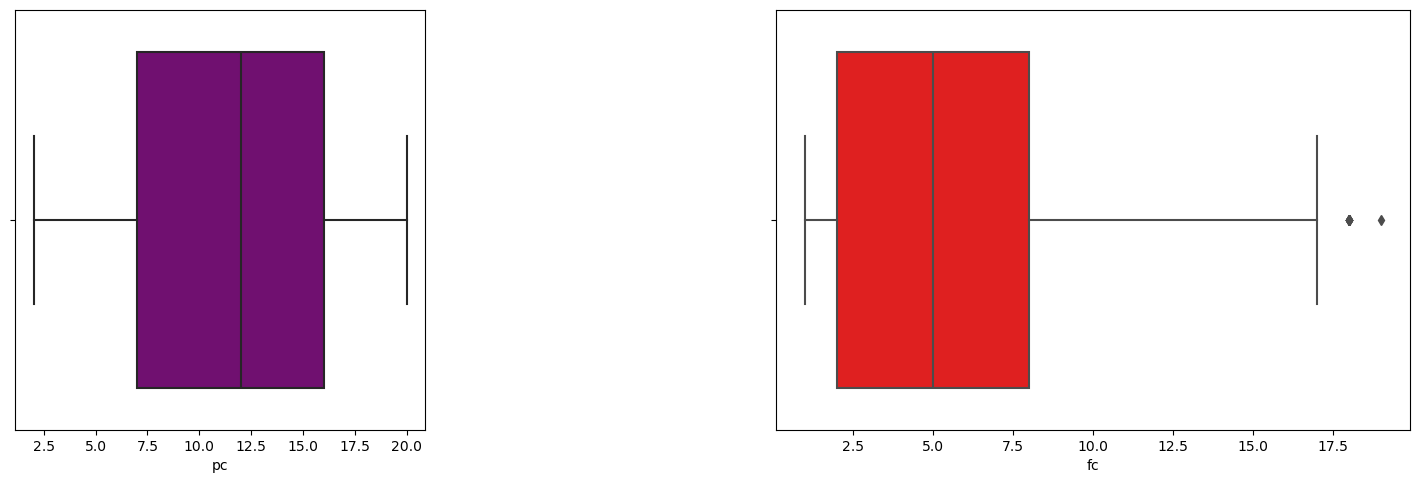

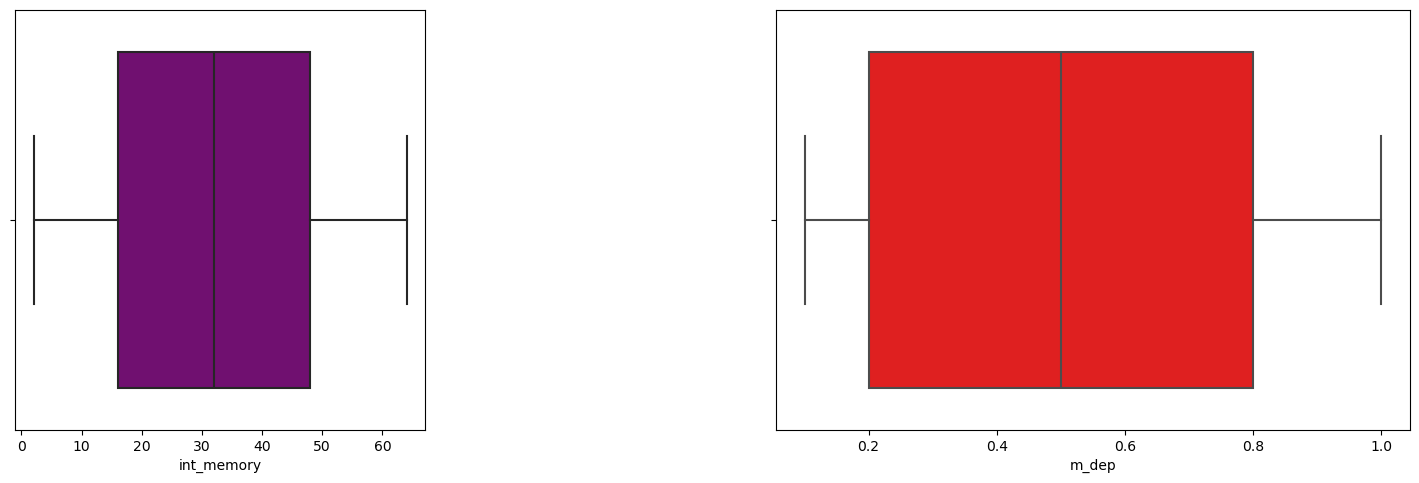

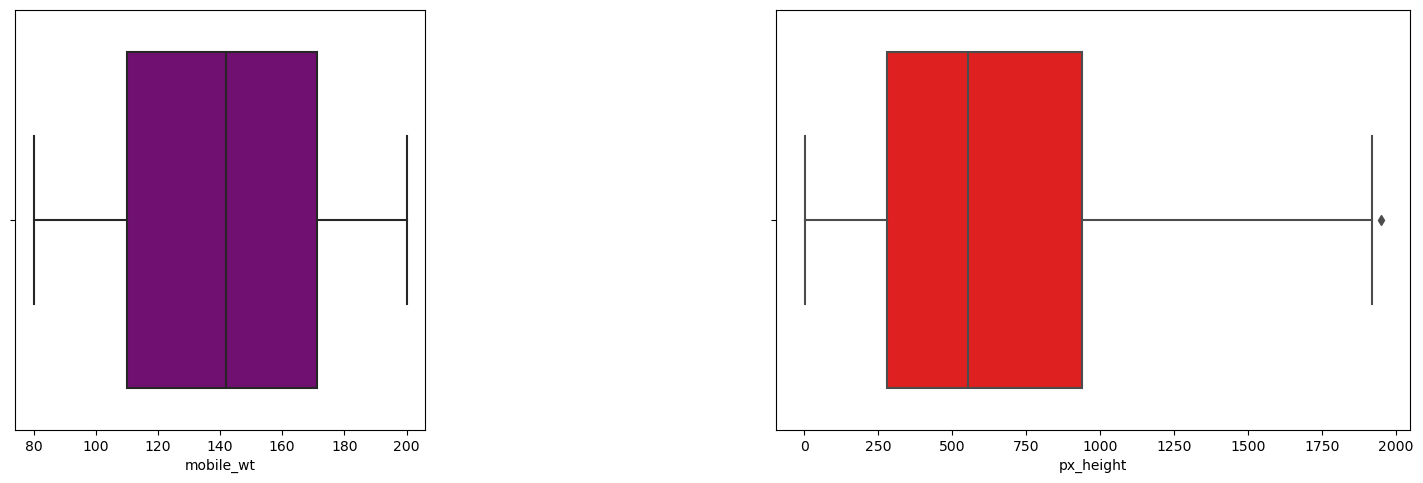

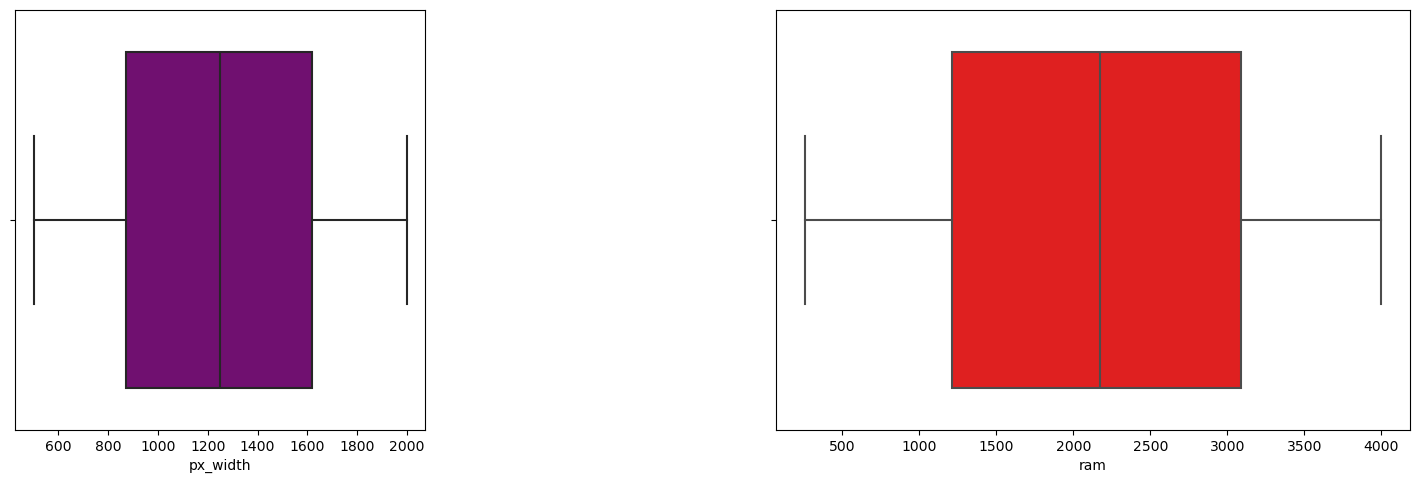

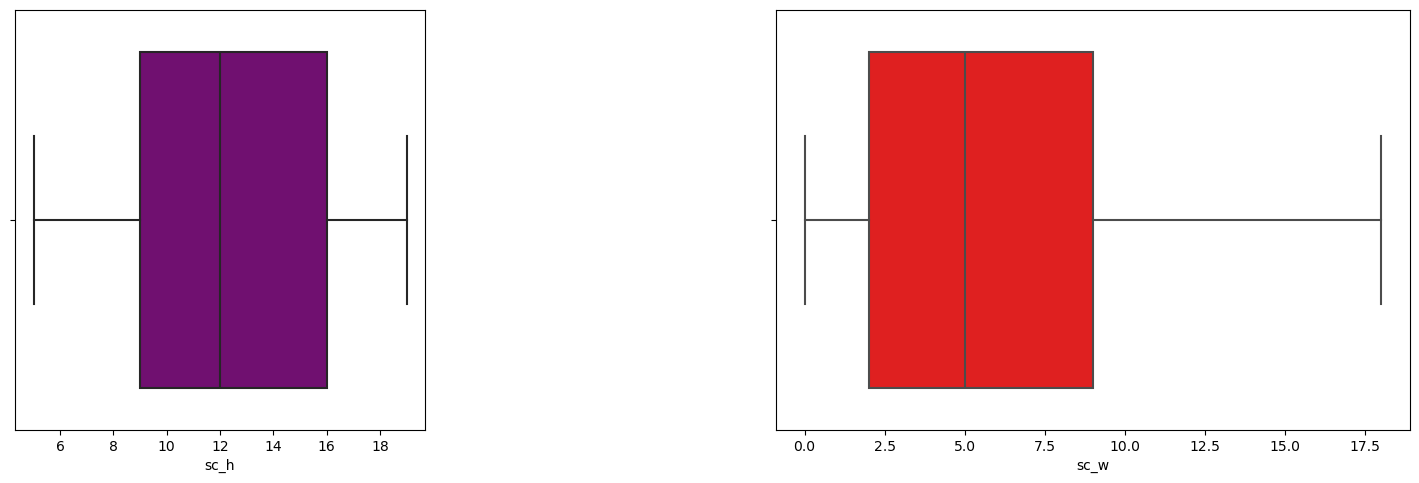

In [15]:
#PLotting for numerical
Numerical = ['battery_power','clock_speed','pc' ,'fc','int_memory', 'm_dep','mobile_wt','px_height','px_width','ram' ,'sc_h', 'sc_w'
             , 'talk_time']
i = 0
while i <12:
    fig = plt.figure(figsize=(18, 12))
    plt.subplot(2,3,1)
    sns.boxplot(x =Numerical [i], color='purple', data= Df)
    i = i+1
    plt.subplot(2,2,2)
    sns.boxplot(x =Numerical [i], color='red', data= Df)
    i = i +1
    plt.show()

In [16]:
Df.iloc[:, 1:]

blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  \
0        0          2.2         0   1       0           7    0.6        188   
2        1          0.5         1   2       1          41    0.9        145   
4        1          1.2         0  13       1          44    0.6        141   
5        0          0.5         1   3       0          22    0.7        164   
6        0          1.7         0   4       1          10    0.8        139   
...    ...          ...       ...  ..     ...         ...    ...        ...   
1992     1          2.9         1   1       0          21    0.2        198   
1994     0          2.2         0   1       0          50    0.1         84   
1997     0          0.9         1   1       1          36    0.7        108   
1998     0          0.9         0   4       1          46    0.1        145   
1999     1          2.0         1   5       1          45    0.9        168   

      n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  three_g  \
0           2   2         20       756  2549     9     7         19        0   
2           5   6       1263      1716  2603    11     2          9        1   
4           2  14       1208      1212  1411     8     2         15        1   
5           1   7       1004      1654  1067    17     1         10        1   
6           8  10        381      1018  3220    13     8         18        1   
...       ...  ..        ...       ...   ...   ...   ...        ...      ...   
1992        3   4        576      1809  1180     6     3          4        1   
1994        1   2        528      1416  3978    17    16          3        1   
1997        8   3        868      1632  3057     9     1          5        1   
1998        5   5        336       670   869    18    10         19        1   
1999        6  16        483       754  3919    19     4          2        1   

      touch_screen  wifi  price_range  
0                0     1            1  
2                1     0            2  
4                1     0            1  
5                0     0            1  
6                0     1            3  
...            ...   ...          ...  
1992             1     1            0  
1994             1     0            3  
1997             1     0            3  
1998             1     1            0  
1999             1     1            3  

[1524 rows x 20 columns]

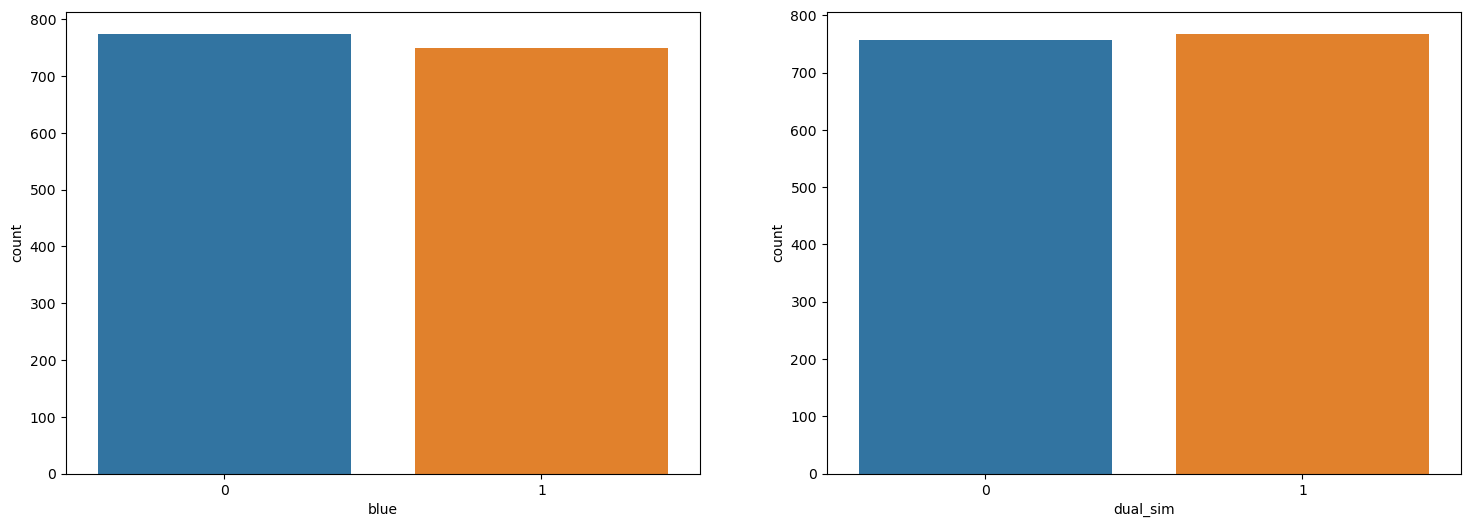

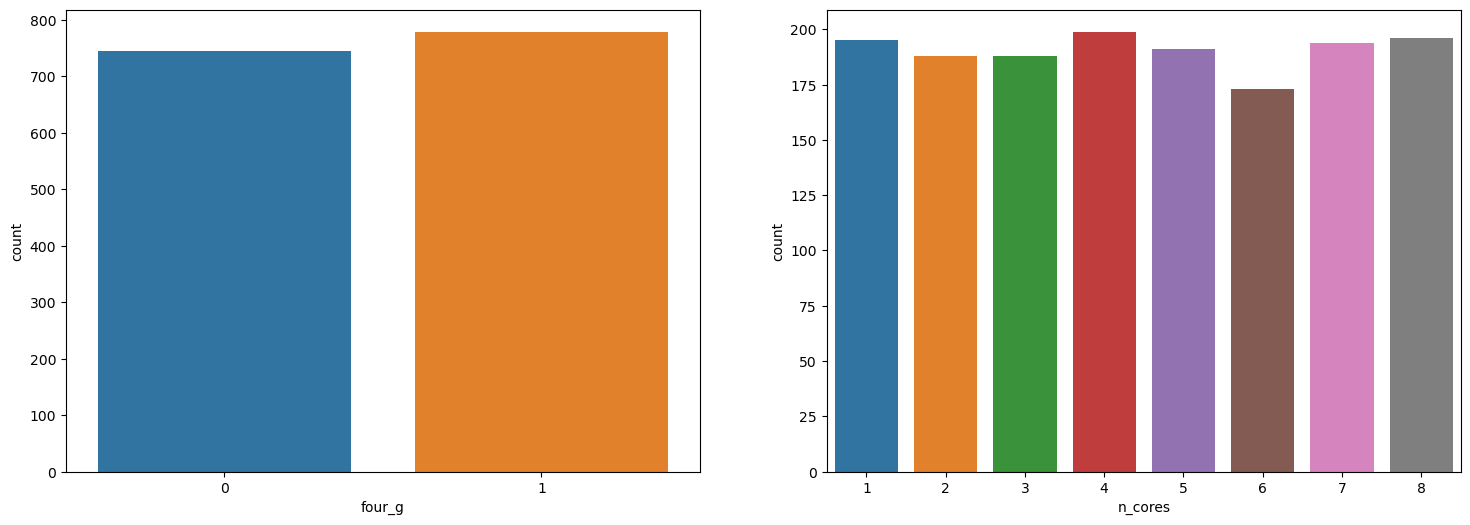

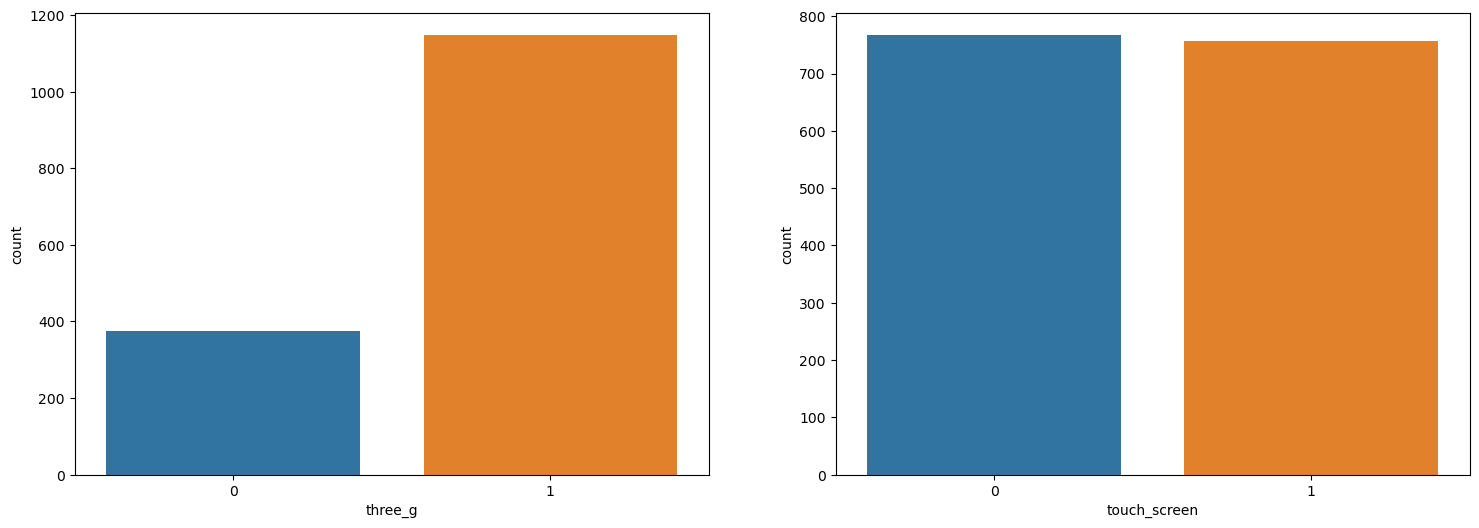

IndexError: list index out of range

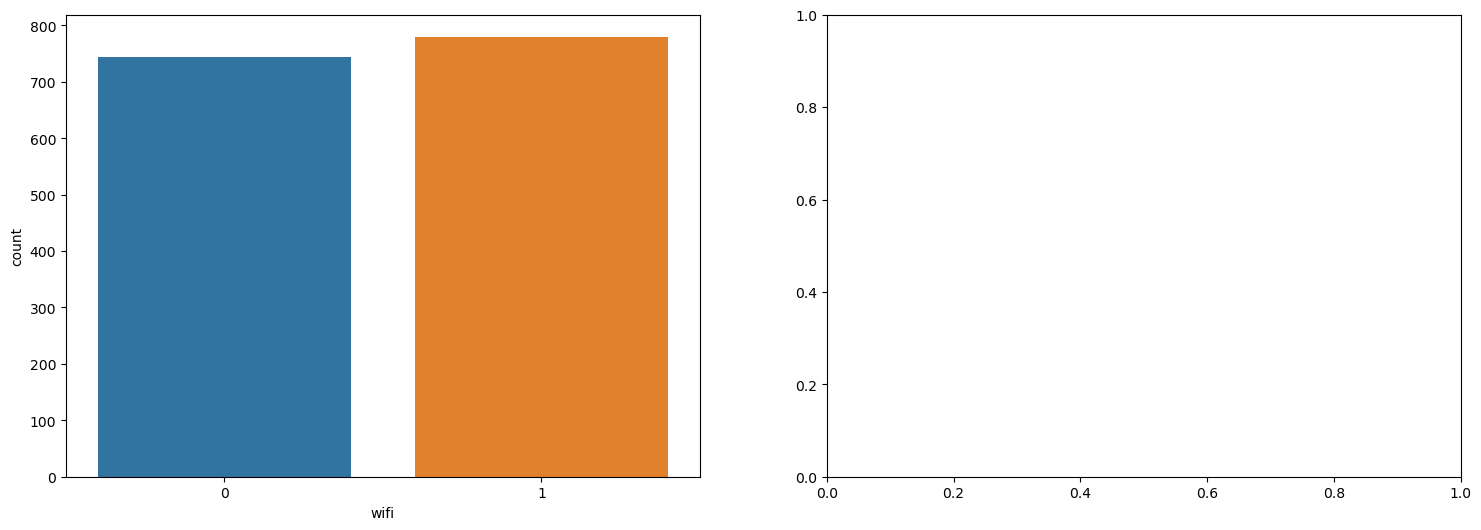

In [17]:
###Defining Categoricalplot
Categorical = ['blue','dual_sim','four_g','n_cores',  'three_g', 'touch_screen', 'wifi']
i = 0
while i <7:
    fig = plt.figure(figsize=(18, 6))
    plt.subplot(1,2,1)
    sns.countplot(x =Categorical [i], data= Df)
    i = i+1
    plt.subplot(1,2,2)
    sns.countplot(x =Categorical [i], data= Df)
    i = i +1
    plt.show()

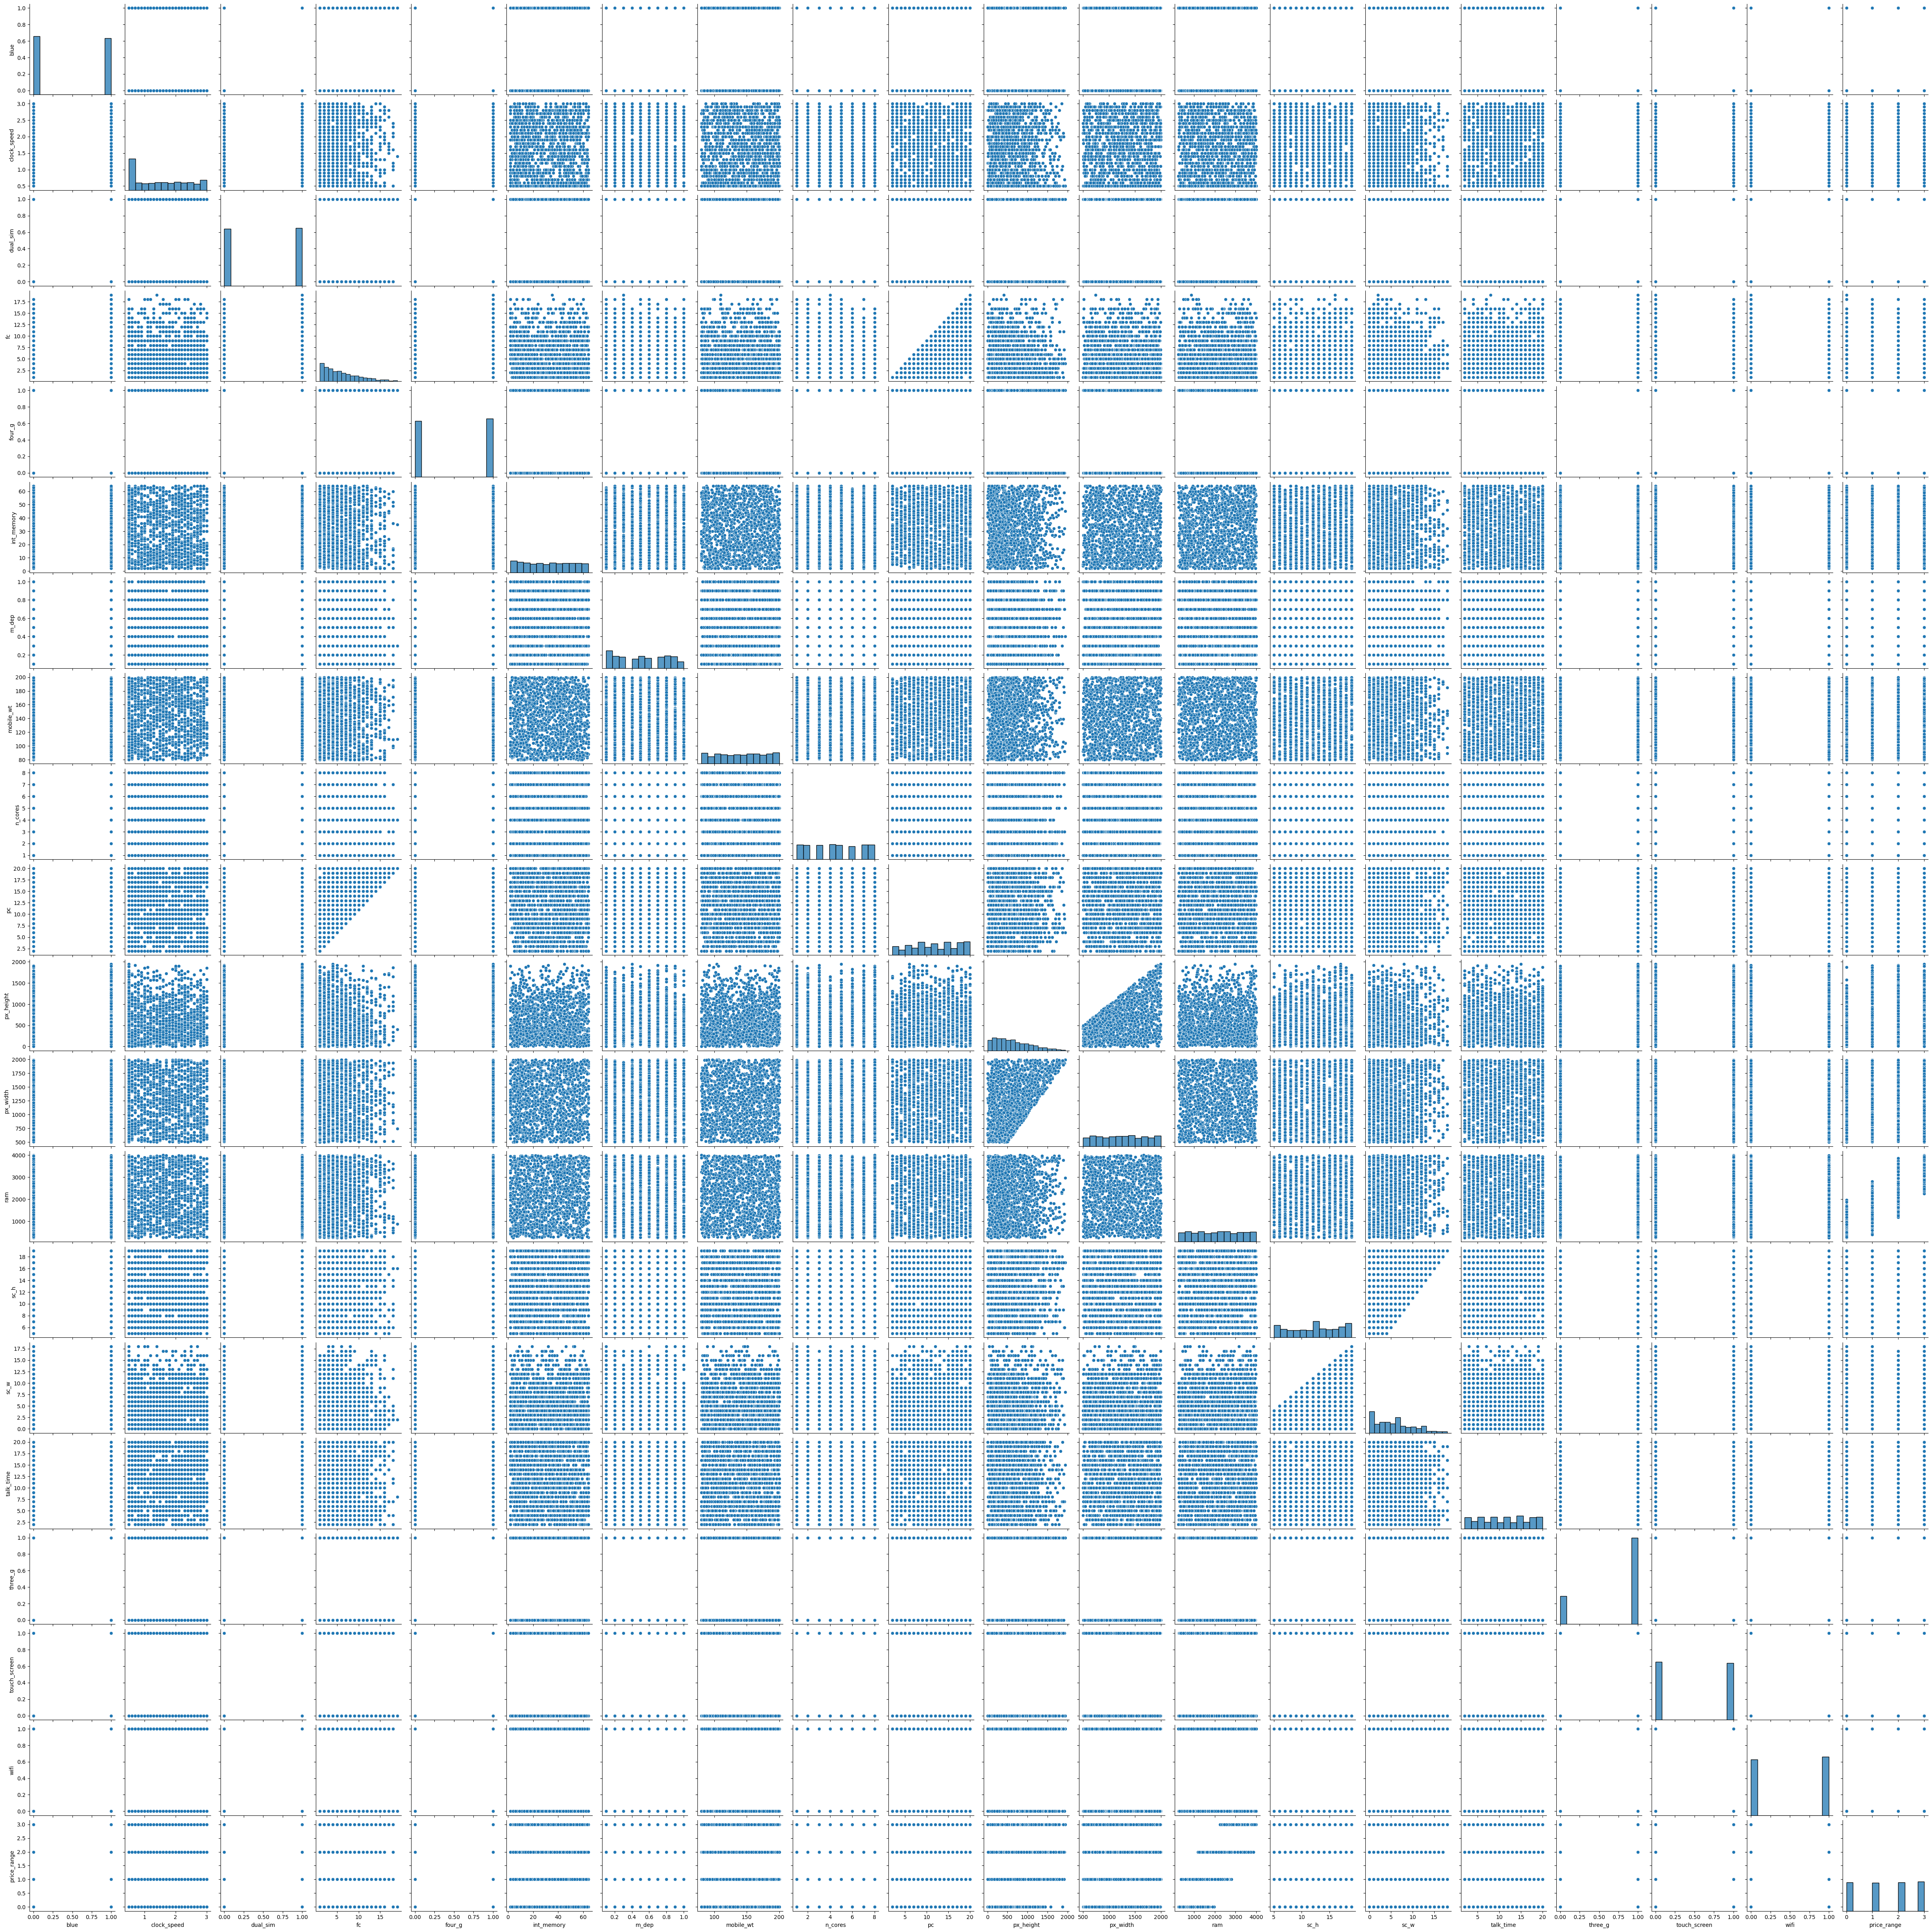

In [18]:
sns.pairplot(Df.iloc[:,1:])

<Axes: xlabel='price_range'>

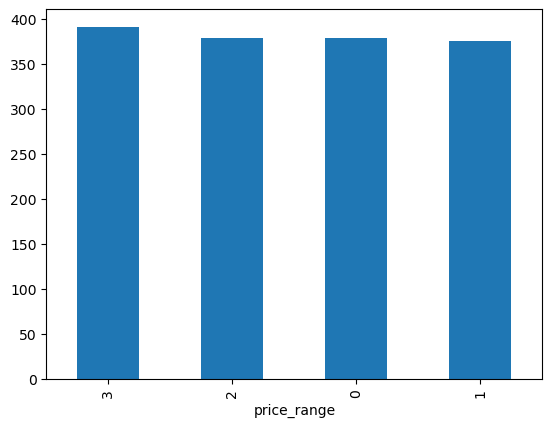

In [19]:
#Analyzing univariant
pd.value_counts(Df["price_range"]).plot(kind="bar")


cross tabulation can be given as :  
 blue           0    1
price_range          
0            200  179
1            190  185
2            193  186
3            192  199
cross tabulation can be given in percentage as :  
 blue                0         1
price_range                    
0            0.527704  0.472296
1            0.506667  0.493333
2            0.509235  0.490765
3            0.491049  0.508951


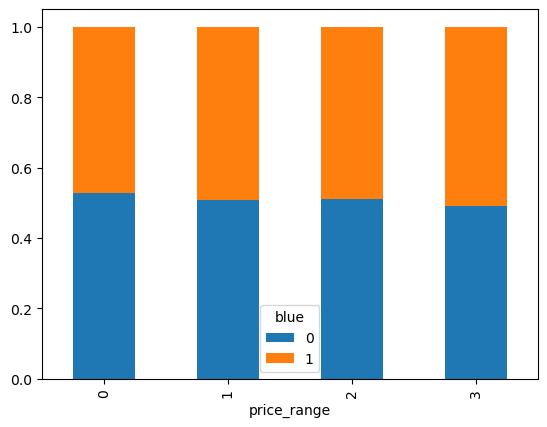

In [20]:
blue = pd.crosstab(Df['price_range'],Df['blue'])
blue.div(blue.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', blue)
print('cross tabulation can be given in percentage as : ', '\n', blue.div(blue.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 dual_sim       0    1
price_range          
0            193  186
1            180  195
2            198  181
3            185  206
cross tabulation can be given in percentage as :  
 dual_sim            0         1
price_range                    
0            0.509235  0.490765
1            0.480000  0.520000
2            0.522427  0.477573
3            0.473146  0.526854


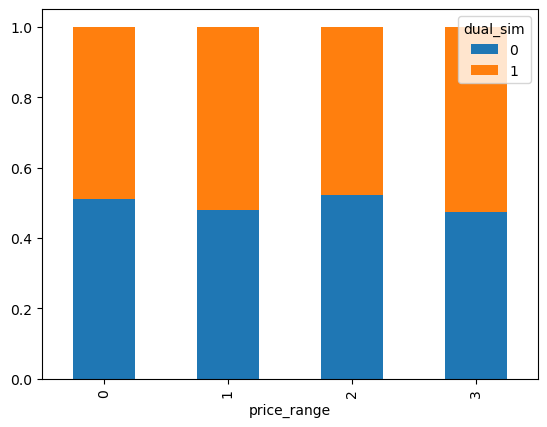

In [21]:
#bivariant analysis
dual_sim = pd.crosstab(Df['price_range'],Df['dual_sim'])
dual_sim.div(dual_sim.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', dual_sim)
print('cross tabulation can be given in percentage as : ', '\n', dual_sim.div(dual_sim.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 four_g         0    1
price_range          
0            188  191
1            182  193
2            189  190
3            186  205
cross tabulation can be given in percentage as :  
 four_g              0         1
price_range                    
0            0.496042  0.503958
1            0.485333  0.514667
2            0.498681  0.501319
3            0.475703  0.524297


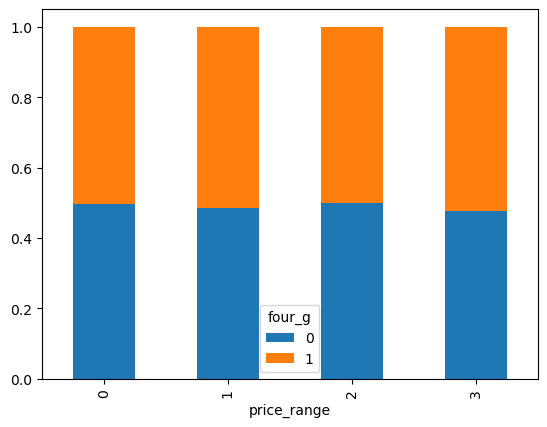

In [22]:
four_g = pd.crosstab(Df['price_range'],Df['four_g'])
four_g.div(four_g.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', four_g)
print('cross tabulation can be given in percentage as : ', '\n', four_g.div(four_g.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 n_cores       1   2   3   4   5   6   7   8
price_range                                
0            38  50  44  48  49  50  49  51
1            59  46  52  53  40  39  42  44
2            44  42  43  56  50  39  50  55
3            54  50  49  42  52  45  53  46
cross tabulation can be given in percentage as :  
 n_cores             1         2         3         4         5         6  \
price_range                                                               
0            0.100264  0.131926  0.116095  0.126649  0.129288  0.131926   
1            0.157333  0.122667  0.138667  0.141333  0.106667  0.104000   
2            0.116095  0.110818  0.113456  0.147757  0.131926  0.102902   
3            0.138107  0.127877  0.125320  0.107417  0.132992  0.115090   

n_cores             7         8  
price_range                      
0            0.129288  0.134565  
1            0.112000  0.117333  
2            0.131926  0.145119  
3            0.135550  0.

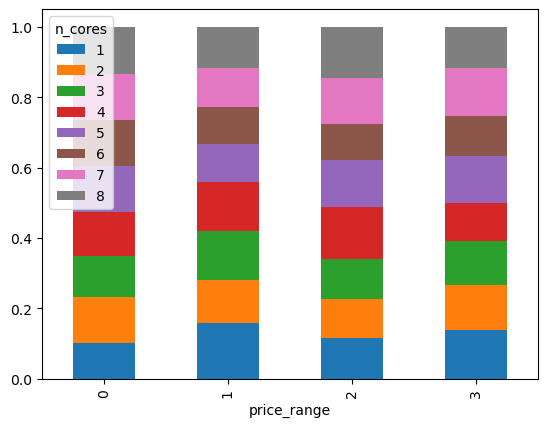

In [23]:
n_cores = pd.crosstab(Df['price_range'],Df['n_cores'])
n_cores.div(n_cores.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', n_cores)
print('cross tabulation can be given in percentage as : ', '\n', n_cores.div(n_cores.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 n_cores       1   2   3   4   5   6   7   8
price_range                                
0            38  50  44  48  49  50  49  51
1            59  46  52  53  40  39  42  44
2            44  42  43  56  50  39  50  55
3            54  50  49  42  52  45  53  46
cross tabulation can be given in percentage as :  
 three_g             0         1
price_range                    
0            0.274406  0.725594
1            0.245333  0.754667
2            0.221636  0.778364
3            0.242967  0.757033


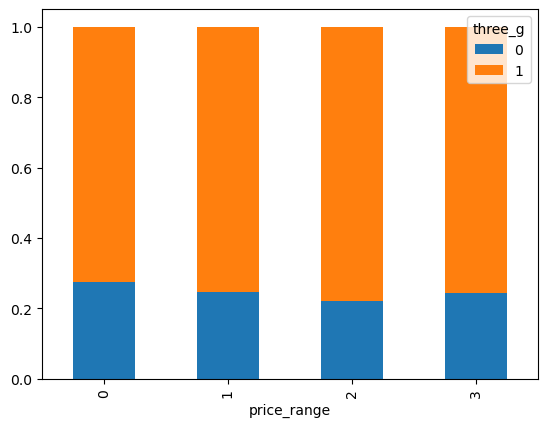

In [24]:
three_g = pd.crosstab(Df['price_range'],Df['three_g'])
three_g.div(three_g.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', n_cores)
print('cross tabulation can be given in percentage as : ', '\n', three_g.div(three_g.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 touch_screen    0    1
price_range           
0             185  194
1             184  191
2             202  177
3             197  194
cross tabulation can be given in percentage as :  
 touch_screen         0         1
price_range                     
0             0.488127  0.511873
1             0.490667  0.509333
2             0.532982  0.467018
3             0.503836  0.496164


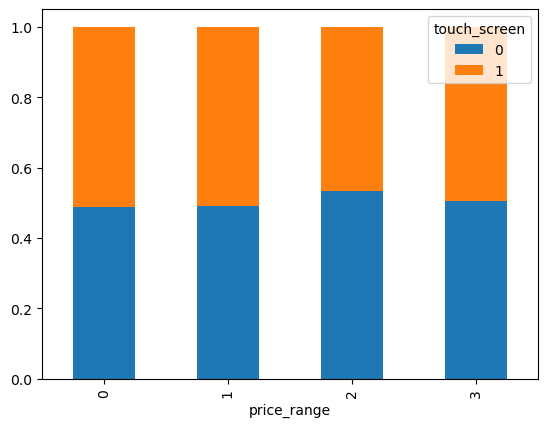

In [25]:
touch_screen = pd.crosstab(Df['price_range'],Df['touch_screen'])
touch_screen.div(touch_screen.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', touch_screen)
print('cross tabulation can be given in percentage as : ', '\n', touch_screen.div(touch_screen.sum(1).astype(float),axis =0))

cross tabulation can be given as :  
 wifi           0    1
price_range          
0            189  190
1            179  196
2            191  188
3            185  206
cross tabulation can be given in percentage as :  
 wifi                0         1
price_range                    
0            0.498681  0.501319
1            0.477333  0.522667
2            0.503958  0.496042
3            0.473146  0.526854


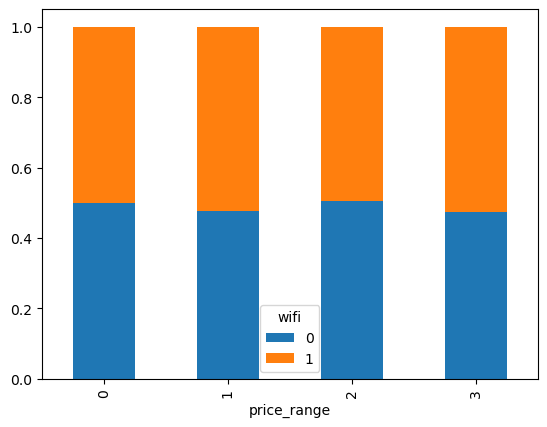

In [26]:
wifi = pd.crosstab(Df['price_range'],Df['wifi'])
wifi.div(wifi.sum(1).astype(float),axis =0).plot(kind='bar',stacked=True)
print('cross tabulation can be given as : ', '\n', wifi)
print('cross tabulation can be given in percentage as : ', '\n', wifi.div(wifi.sum(1).astype(float),axis =0))

<Axes: xlabel='blue', ylabel='clock_speed'>

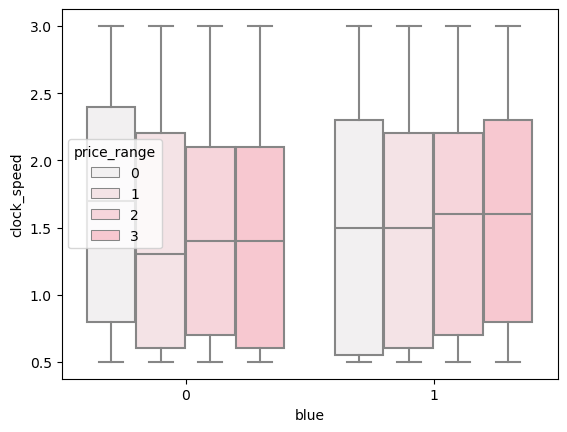

In [27]:
#BiVariant ANalysis
sns.boxplot(x="blue", y='clock_speed', hue="price_range", data=Df,color='pink')

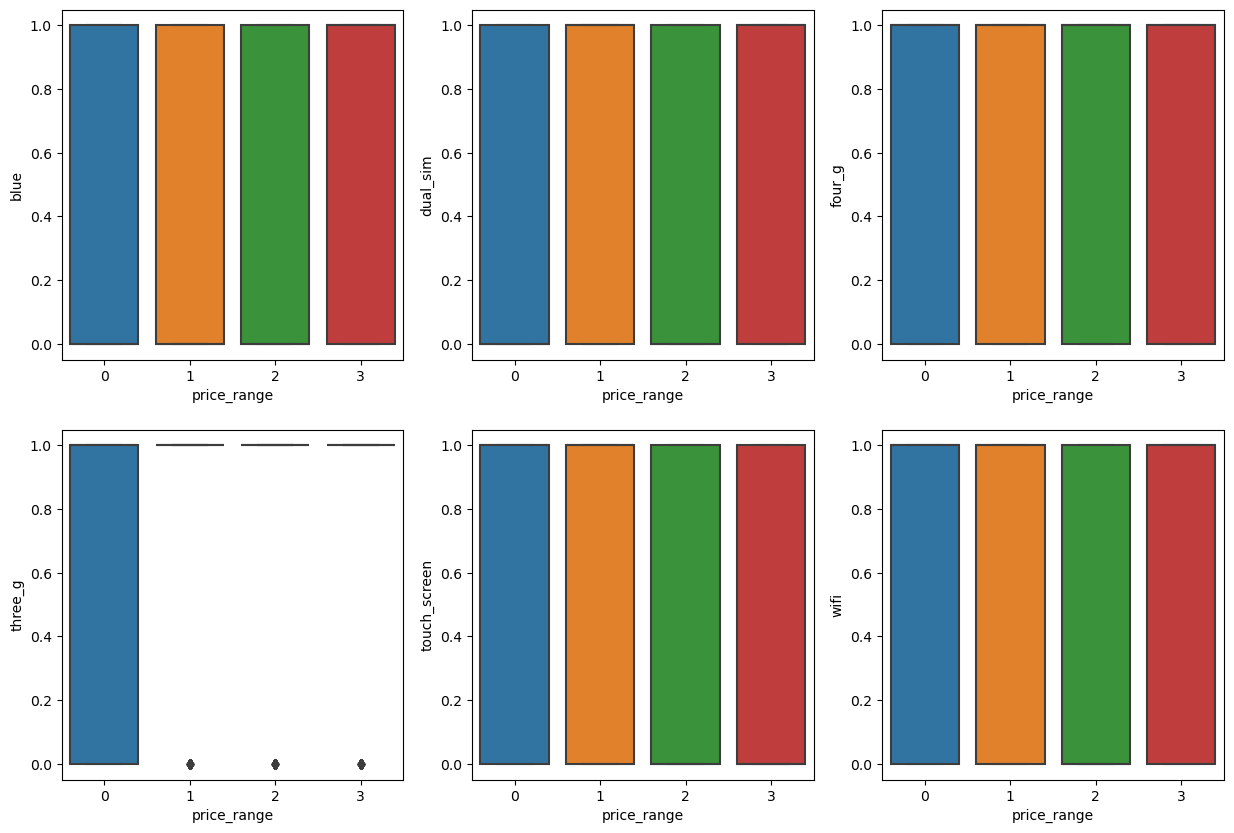

<Figure size 640x480 with 0 Axes>

In [28]:
#Bivarian in Categorical analysis
categorical_1 = ['blue' , 'dual_sim' ,'four_g' , 'three_g' , 'touch_screen', 'wifi']
fig, ax_1 = plt.subplots(2, 3, figsize=(15, 10))
for var_1, subplot in zip(categorical_1, ax_1.flatten()):
    sns.boxplot(x='price_range', y=var_1, data=Df, ax=subplot)
plt.show()
plt.clf()

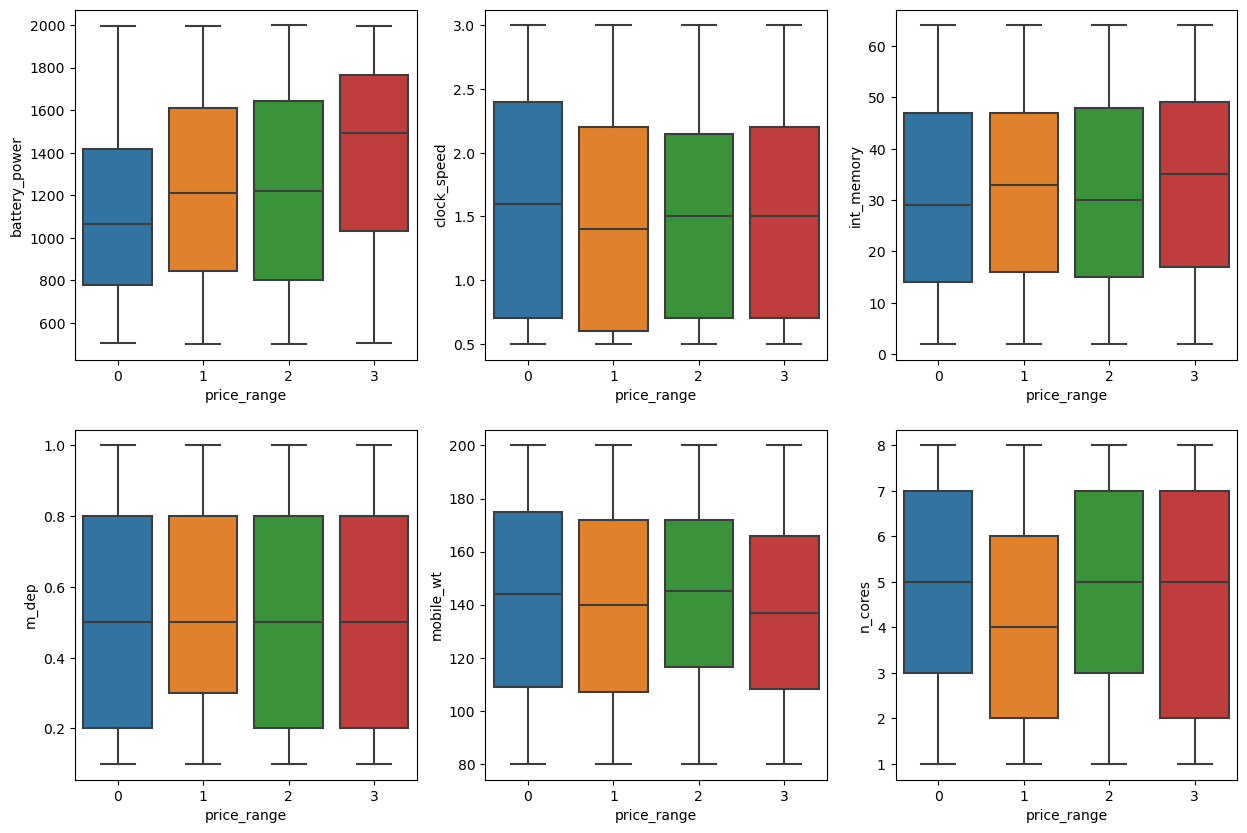

<Figure size 640x480 with 0 Axes>

In [29]:
#Bivarian in numerical analysis
numerical_1 = ['battery_power' , 'clock_speed' ,'int_memory' ,'m_dep' , 'mobile_wt' , 'n_cores', 'pc', 'px_height'
              , 'px_width' , 'ram', 'sc_h', 'sc_w' , 'talk_time']
fig, ax_1 = plt.subplots(2, 3, figsize=(15, 10))
for var_1, subplot in zip(numerical_1, ax_1.flatten()):
    sns.boxplot(x='price_range', y=var_1, data=Df, ax=subplot)
plt.show()
plt.clf()

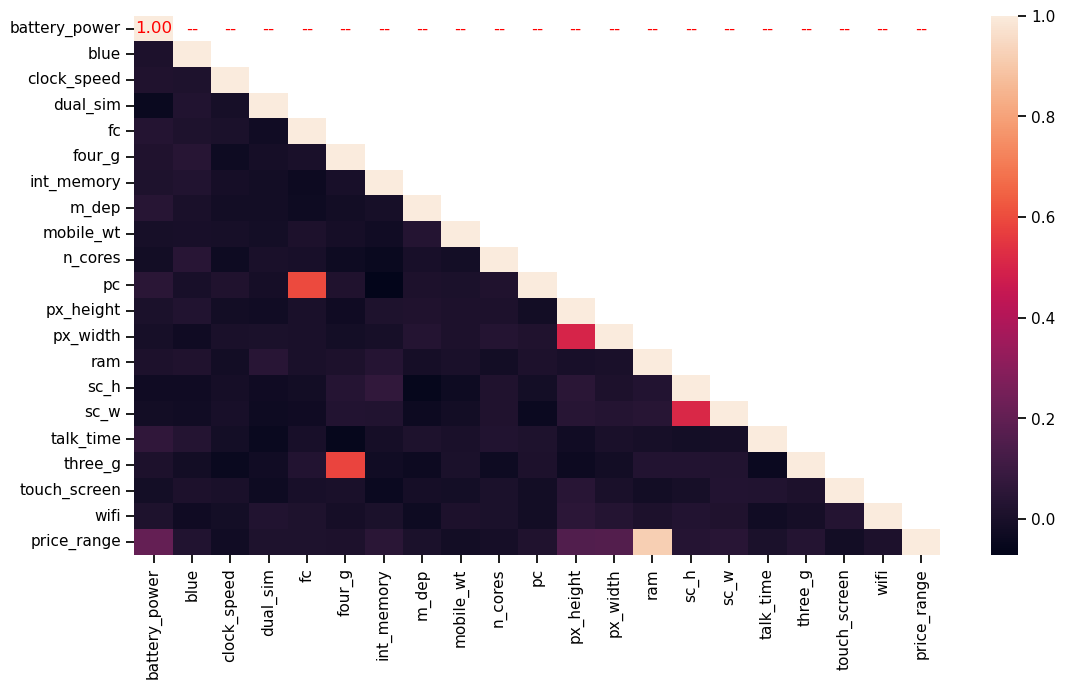

In [30]:
# Correlation with heat map
corr_overall = Df.corr()

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5, 'text.color': 'white'})

#sns.set_context("notebook", font_scale=1.0,  rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr_overall)
mask[np.triu_indices_from(mask, 1)] = True
a= sns.heatmap(corr_overall, mask=mask, annot=True, fmt='.2f', annot_kws={"color": "red"})
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)

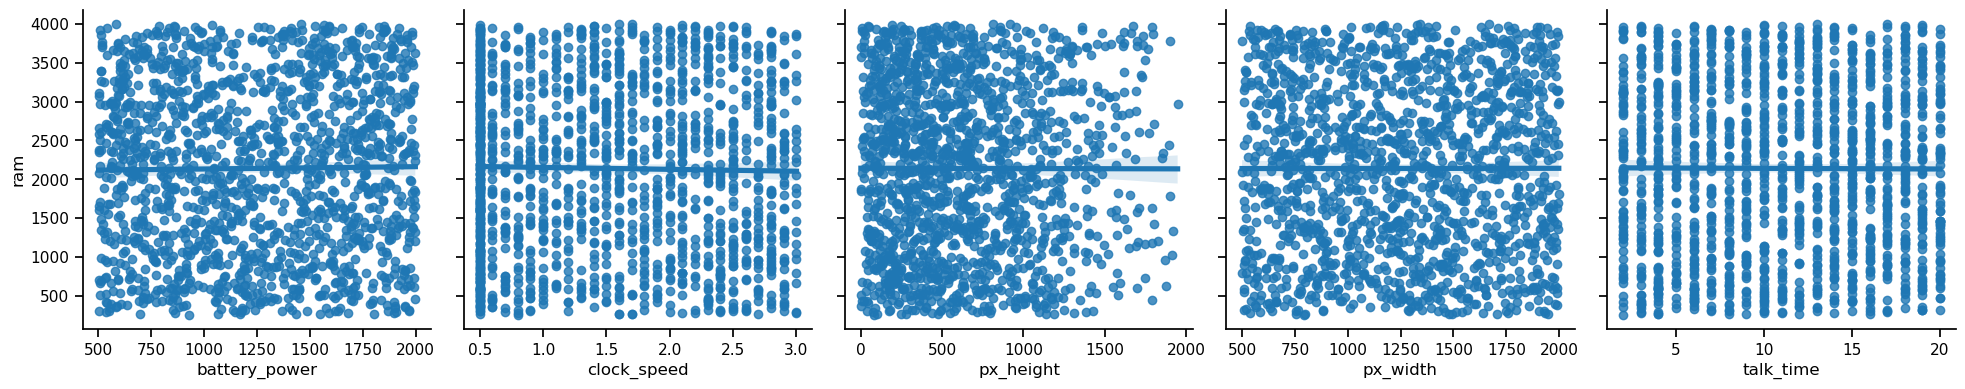

In [31]:
ncol_2 = ['battery_power' ,'clock_speed', 'px_height', 'px_width' , 'talk_time']
grid = sns.PairGrid(Df, y_vars = 'ram', x_vars = ncol_2, height = 4)
grid.map(sns.regplot);

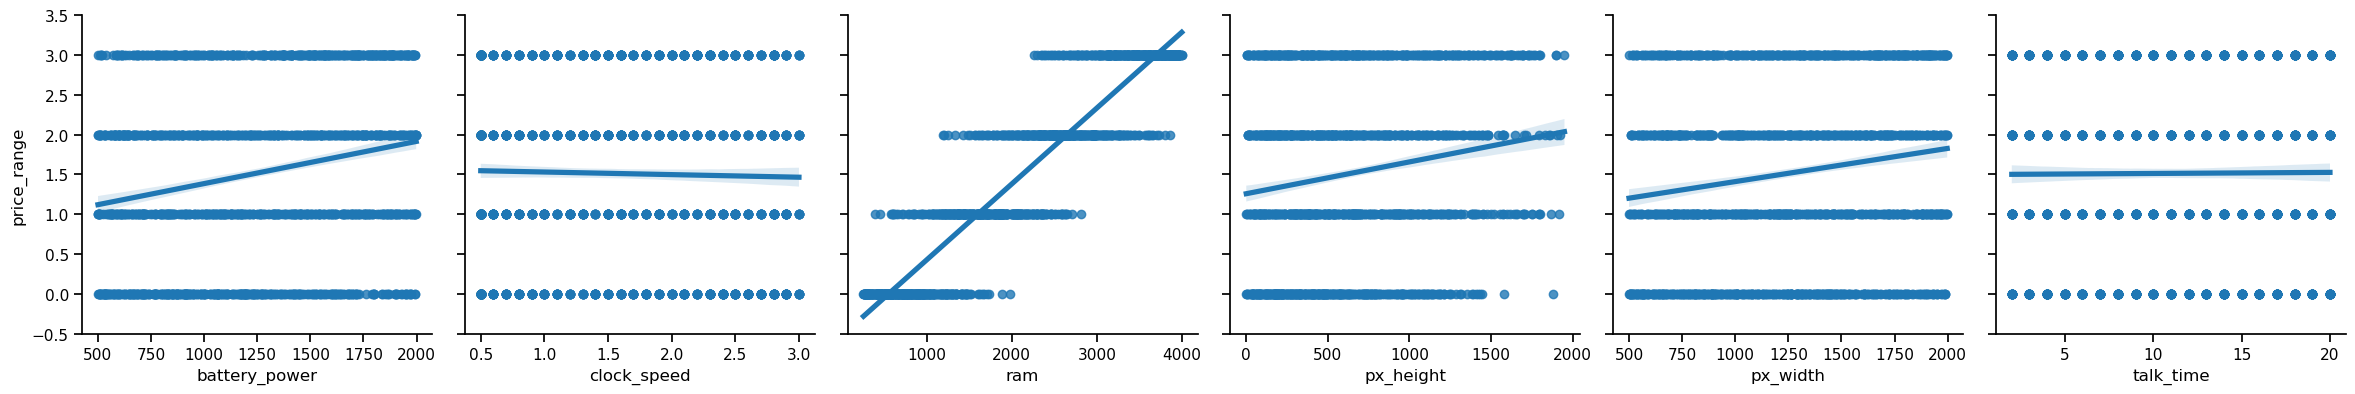

In [32]:
ncol_2 = ['battery_power' ,'clock_speed','ram', 'px_height', 'px_width' , 'talk_time']
grid = sns.PairGrid(Df, y_vars = 'price_range', x_vars = ncol_2, height = 4)
grid.map(sns.regplot);

<Axes: >

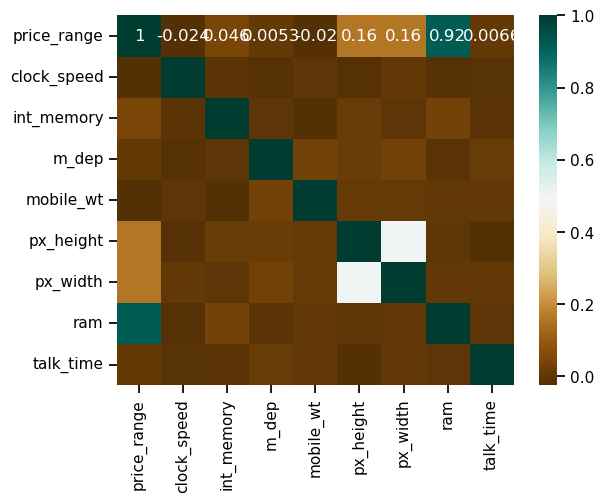

In [33]:
sns.heatmap(Df[['price_range','clock_speed' ,'int_memory', 'm_dep', 'mobile_wt', 'px_height' 
                , 'px_width' , 'ram' , 'talk_time']].corr(),  cmap='BrBG', annot = True)

<Axes: xlabel='price_range', ylabel='ram'>

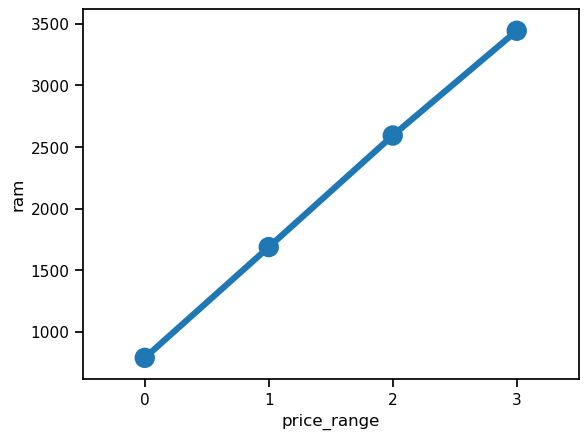

In [34]:
sns.pointplot(y='ram',x='price_range',data=Df)


<Axes: xlabel='price_range', ylabel='battery_power'>

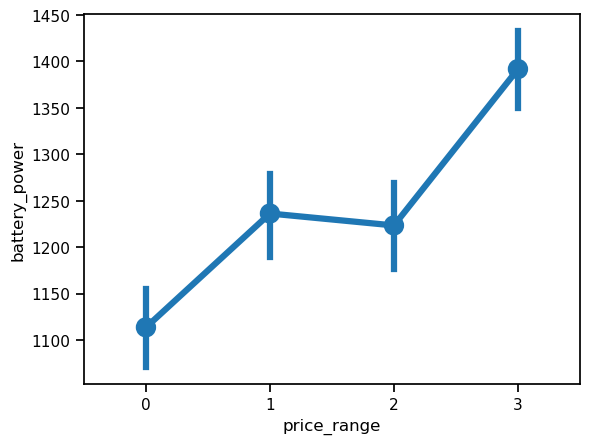

In [35]:
sns.pointplot(y='battery_power',x='price_range',data=Df)


<Axes: xlabel='price_range', ylabel='px_height'>

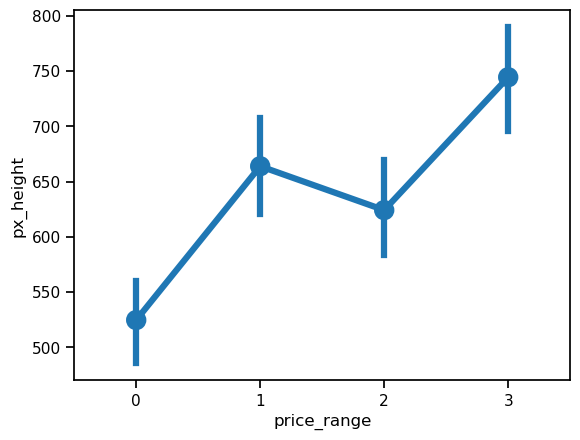

In [36]:
sns.pointplot(y='px_height',x='price_range',data=Df)


<Axes: xlabel='price_range', ylabel='px_width'>

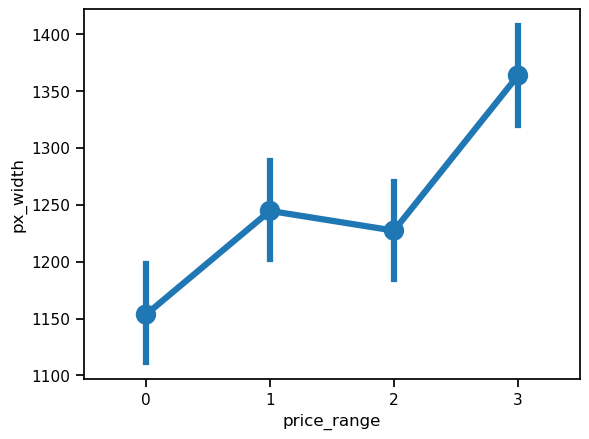

In [37]:
sns.pointplot(y='px_width',x='price_range',data=Df)


<Axes: xlabel='price_range', ylabel='int_memory'>

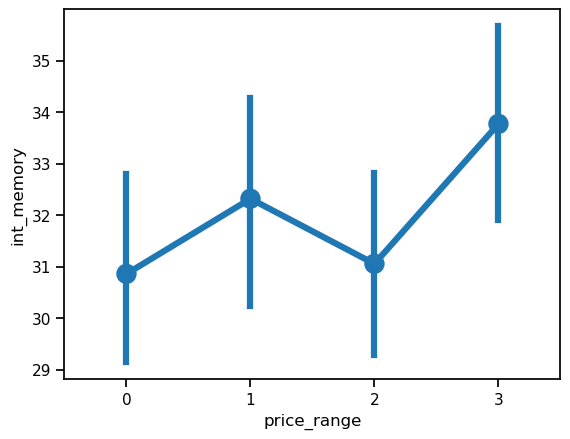

In [38]:
sns.pointplot(y='int_memory',x='price_range',data=Df)


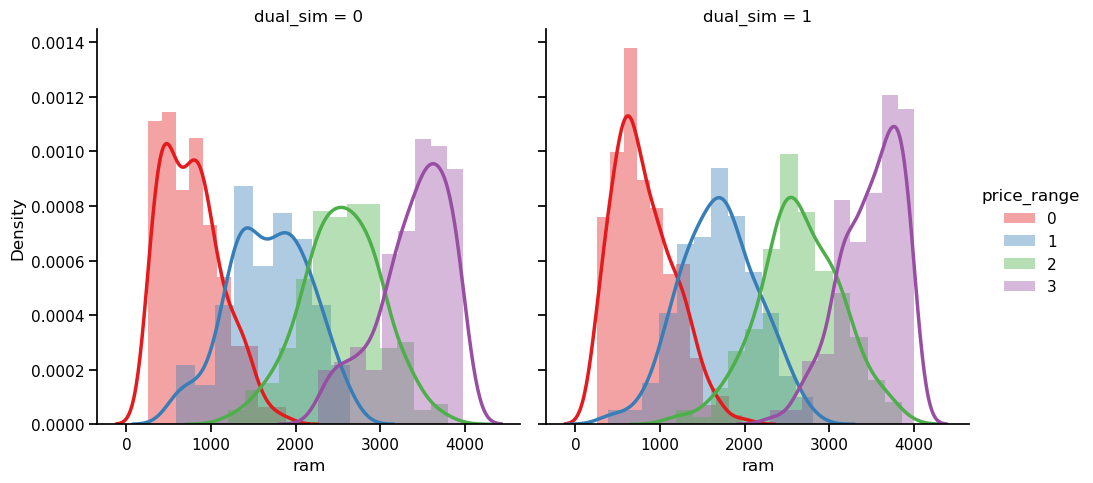

In [39]:
g = sns.FacetGrid(Df, col="dual_sim", hue="price_range", palette="Set1",height=5
                   )
g = (g.map(sns.distplot, "ram").add_legend())

In [40]:
Df[['price_range','clock_speed' ,'int_memory', 'm_dep', 'mobile_wt', 'n_cores','pc' ,'fc' , 'px_height' 
                , 'px_width' , 'ram' , 'talk_time']].corr()

price_range  clock_speed  int_memory     m_dep  mobile_wt  \
price_range     1.000000    -0.023769    0.046350  0.005326  -0.020312   
clock_speed    -0.023769     1.000000   -0.010877 -0.016840  -0.005738   
int_memory      0.046350    -0.010877    1.000000 -0.006696  -0.021034   
m_dep           0.005326    -0.016840   -0.006696  1.000000   0.029771   
mobile_wt      -0.020312    -0.005738   -0.021034  0.029771   1.000000   
n_cores        -0.010630    -0.031246   -0.043222 -0.002003  -0.015621   
pc              0.020973     0.021072   -0.070927  0.011456   0.006846   
fc              0.012918     0.007004   -0.037174 -0.031179   0.010895   
px_height       0.157502    -0.017757    0.015982  0.020029   0.009112   
px_width        0.160061     0.003111   -0.005261  0.030865   0.010210   
ram             0.919402    -0.018290    0.035970 -0.009893   0.003073   
talk_time       0.006596    -0.013611   -0.011500  0.015105   0.001816   

              n_cores        pc        fc  px_height  px_width       ram  \
price_range -0.010630  0.020973  0.012918   0.157502  0.160061  0.919402   
clock_speed -0.031246  0.021072  0.007004  -0.017757  0.003111 -0.018290   
int_memory  -0.043222 -0.070927 -0.037174   0.015982 -0.005261  0.035970   
m_dep       -0.002003  0.011456 -0.031179   0.020029  0.030865 -0.009893   
mobile_wt   -0.015621  0.006846  0.010895   0.009112  0.010210  0.003073   
n_cores      1.000000  0.017648 -0.003461   0.011617  0.029733 -0.017309   
pc           0.017648  1.000000  0.595732  -0.019595  0.018014  0.008965   
fc          -0.003461  0.595732  1.000000   0.004168  0.001890  0.000572   
px_height    0.011617 -0.019595  0.004168   1.000000  0.499476 -0.001737   
px_width     0.029733  0.018014  0.001890   0.499476  1.000000  0.000858   
ram         -0.017309  0.008965  0.000572  -0.001737  0.000858  1.000000   
talk_time    0.023271  0.015246 -0.001744  -0.021982  0.002121 -0.004144   

             talk_time  
price_range   0.006596  
clock_speed  -0.013611  
int_memory   -0.011500  
m_dep         0.015105  
mobile_wt     0.001816  
n_cores       0.023271  
pc            0.015246  
fc           -0.001744  
px_height    -0.021982  
px_width      0.002121  
ram          -0.004144  
talk_time     1.000000

In [41]:
Df[['price_range','blue' ,'dual_sim', 'three_g', 'four_g', 'touch_screen' 
                , 'wifi']].corr()

price_range      blue  dual_sim   three_g    four_g  \
price_range      1.000000  0.024167  0.015105  0.030426  0.010847   
blue             0.024167  1.000000  0.025073 -0.017366  0.039766   
dual_sim         0.015105  0.025073  1.000000 -0.021401 -0.009365   
three_g          0.030426 -0.017366 -0.021401  1.000000  0.584179   
four_g           0.010847  0.039766 -0.009365  0.584179  1.000000   
touch_screen    -0.019781  0.011679 -0.031436  0.012260  0.001488   
wifi             0.011417 -0.027168  0.023443 -0.009359 -0.012345   

              touch_screen      wifi  
price_range      -0.019781  0.011417  
blue              0.011679 -0.027168  
dual_sim         -0.031436  0.023443  
three_g           0.012260 -0.009359  
four_g            0.001488 -0.012345  
touch_screen      1.000000  0.031692  
wifi              0.031692  1.000000

In [42]:
Df.drop_duplicates()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
2               563     1          0.5         1   2       1          41   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
6              1821     0          1.7         0   4       1          10   
...             ...   ...          ...       ...  ..     ...         ...   
1992            674     1          2.9         1   1       0          21   
1994            858     0          2.2         0   1       0          50   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
2       0.9        145        5  ...       1263      1716  2603    11     2   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
6       0.8        139        8  ...        381      1018  3220    13     8   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1992    0.2        198        3  ...        576      1809  1180     6     3   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
2             9        1             1     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
6            18        1             0     1            3  
...         ...      ...           ...   ...          ...  
1992          4        1             1     1            0  
1994          3        1             1     0            3  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1524 rows x 21 columns]

In [43]:
Df.dropna()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
2               563     1          0.5         1   2       1          41   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
6              1821     0          1.7         0   4       1          10   
...             ...   ...          ...       ...  ..     ...         ...   
1992            674     1          2.9         1   1       0          21   
1994            858     0          2.2         0   1       0          50   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
2       0.9        145        5  ...       1263      1716  2603    11     2   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
6       0.8        139        8  ...        381      1018  3220    13     8   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1992    0.2        198        3  ...        576      1809  1180     6     3   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
2             9        1             1     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
6            18        1             0     1            3  
...         ...      ...           ...   ...          ...  
1992          4        1             1     1            0  
1994          3        1             1     0            3  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1524 rows x 21 columns]

In [44]:
#######################defining Model for Logestic Regression
#######################defining X, Y
X = Df.drop ('price_range', axis=1).values
Y = Df['price_range'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model



X-Train Shape : (1066, 20)
X-Test Shape : (458, 20)
Y-Train Shape : (1066, 1)
Y-Test Shape : (458, 1)


In [45]:
######Defining a Model (Logestic Regression)
from sklearn.metrics import classification_report, confusion_matrix
LogRegressor =LogisticRegression (solver = 'liblinear')
LogRegressor.fit(X_train, Y_train)


LogisticRegression(solver='liblinear')

In [46]:
LogRegressor.classes_

array([0, 1, 2, 3], dtype=int64)

In [47]:
Y_pred = LogRegressor.predict(X_test)
predictProb = LogRegressor.predict_proba(X_test)

In [48]:
### Confusion matrix for logestic regresion

confusion_matrix (Y , LogRegressor.predict(X))

array([[358,  19,   2,   0],
       [ 44, 248,  79,   4],
       [  0,  86, 193, 100],
       [  0,   1,  22, 368]], dtype=int64)

In [49]:
from sklearn.metrics import classification_report

print ("Accuracy of Logestic regression:", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, LogRegressor.predict(X)),'\n')
print ('Logestic regression.score (X, Y) of Model:', LogRegressor.score(X, Y))
print ("Accuracy of Logestic regression:", metrics.accuracy_score(Y_test, Y_pred),'\n')



Accuracy of Logestic regression: 0.74235807860262 

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       379
           1       0.70      0.66      0.68       375
           2       0.65      0.51      0.57       379
           3       0.78      0.94      0.85       391

    accuracy                           0.77      1524
   macro avg       0.76      0.76      0.76      1524
weighted avg       0.76      0.77      0.76      1524
 

Logestic regression.score (X, Y) of Model: 0.765748031496063
Accuracy of Logestic regression: 0.74235807860262 



In [50]:
# Define the hyperparameters to tuning of the Logistic regression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(LogRegressor, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Make predictions using the best estimator
LogRegressor_op = grid_search.best_estimator_
Y_pred = LogRegressor_op.predict(X_test)

# Calculate the accuracy of the best classifier
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy with best hyperparameters of Logestic Regression: {accuracy}')

print (classification_report(Y, LogRegressor_op.predict(X)),'\n')
print ('Logestic regression Optimization.score (X, Y) of Model:', LogRegressor_op.score(X, Y))
print ("Accuracy of optimized Logestic regression:", metrics.accuracy_score(Y_test, Y_pred),'\n')


Best hyperparameters: {'C': 10, 'penalty': 'l1'}
Accuracy with best hyperparameters of Logestic Regression: 0.8580786026200873
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       379
           1       0.75      0.78      0.77       375
           2       0.78      0.72      0.75       379
           3       0.97      1.00      0.99       391

    accuracy                           0.88      1524
   macro avg       0.87      0.87      0.87      1524
weighted avg       0.87      0.88      0.87      1524
 

Logestic regression Optimization.score (X, Y) of Model: 0.8753280839895013
Accuracy of optimized Logestic regression: 0.8580786026200873 



In [51]:

###optimized Confusion matrix for logestic regresion

confusion_matrix (Y , LogRegressor_op.predict(X))

array([[378,   1,   0,   0],
       [  5, 294,  76,   0],
       [  0,  97, 272,  10],
       [  0,   0,   1, 390]], dtype=int64)

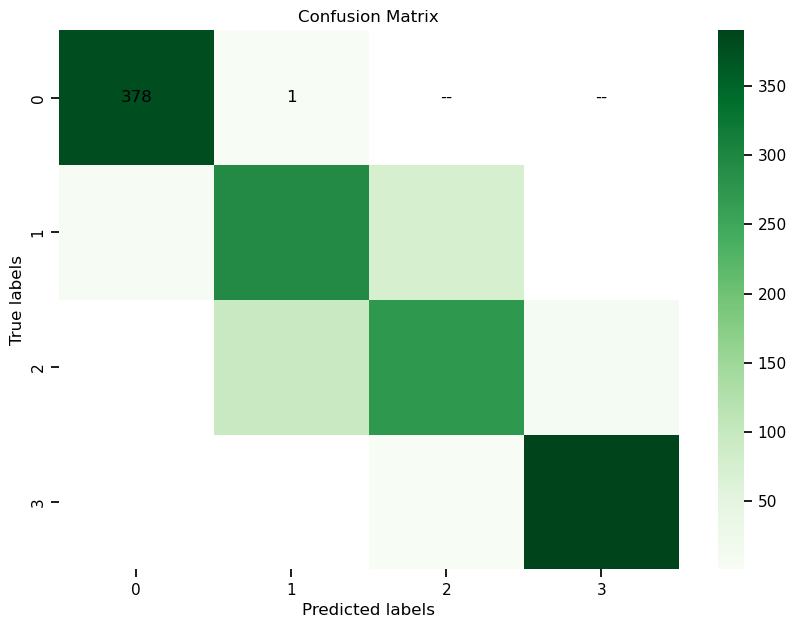

In [52]:
###optimized Confusion matrix for logestic regresion
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y contains the true labels and KNNClassifier.predict(X) contains the predicted labels
cm = confusion_matrix(Y, LogRegressor_op.predict(X))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', annot_kws={"color": "black"}, mask=cm==0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
####Decision Tree


In [54]:
#######################defining Model
#######################defining X, Y
X = Df.drop ('price_range', axis=1).values
Y = Df['price_range'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model



X-Train Shape : (1066, 20)
X-Test Shape : (458, 20)
Y-Train Shape : (1066, 1)
Y-Test Shape : (458, 1)


In [55]:
######Defining a Model
####Decision Tree
DTClassifier = DecisionTreeClassifier(max_depth=7)
DTClassifier.fit(X_train , Y_train.ravel())
Y_pred = DTClassifier.predict(X_test)
print ("Accurancy: " , metrics.accuracy_score(Y_test, Y_pred))


Accurancy:  0.8296943231441049


In [56]:
from sklearn import tree
text_representation = tree.export_text(DTClassifier)
print (text_representation)

|--- feature_13 <= 2368.00
|   |--- feature_13 <= 1052.50
|   |   |--- feature_11 <= 1449.00
|   |   |   |--- feature_6 <= 63.50
|   |   |   |   |--- feature_0 <= 1660.00
|   |   |   |   |   |--- feature_12 <= 1891.50
|   |   |   |   |   |   |--- feature_0 <= 1503.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  1503.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_12 >  1891.50
|   |   |   |   |   |   |--- feature_13 <= 743.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_13 >  743.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  1660.00
|   |   |   |   |   |--- feature_11 <= 719.00
|   |   |   |   |   |   |--- feature_7 <= 0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  0.95
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_11 >  719.00
|   |   |   |   |   |   |--- feature_13 <= 371.50
|   |

In [57]:
from sklearn.metrics import classification_report

print ("Accuracy of Decision Tree:", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, DTClassifier.predict(X)),'\n')
print ('Decision Tree.score (X, Y) of Model:', DTClassifier.score(X, Y))
print ("Accuracy of Decision Tree:", metrics.accuracy_score(Y_test, Y_pred),'\n')



Accuracy of Decision Tree: 0.8296943231441049 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       379
           1       0.86      0.95      0.90       375
           2       0.91      0.85      0.88       379
           3       0.95      0.95      0.95       391

    accuracy                           0.92      1524
   macro avg       0.93      0.92      0.92      1524
weighted avg       0.93      0.92      0.92      1524
 

Decision Tree.score (X, Y) of Model: 0.9245406824146981
Accuracy of Decision Tree: 0.8296943231441049 



In [58]:
#CM 
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix (Y , DTClassifier.predict(X))


array([[357,  22,   0,   0],
       [  4, 358,  13,   0],
       [  0,  37, 323,  19],
       [  0,   0,  20, 371]], dtype=int64)

In [62]:
#tunig for DT is finding the best depth of decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with depths to consider
param_grid = {'max_depth': [3, 5, 7, 10, None]}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best depth from the grid search results
best_depth = grid_search.best_params_['max_depth']
print("Best Depth:", best_depth)


Best Depth: 5


In [63]:
# hyper parameter tuning

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(DTClassifier, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=7), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [64]:
grid_search.best_params_


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [65]:
#Applying optimized value in DT
DTClassifier_Op = grid_search.best_estimator_
Y_pred=DTClassifier_Op.predict(X_test)

print ("Accuracy of Decision Tree:", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, DTClassifier_Op.predict(X)),'\n')
print ('Decision Tree.score (X, Y) of Model:', DTClassifier_Op.score(X, Y))
print ("Accuracy of Decision Tree:", metrics.accuracy_score(Y_test, Y_pred),'\n')



Accuracy of Decision Tree: 0.8209606986899564 

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       379
           1       0.93      0.89      0.91       375
           2       0.88      0.91      0.89       379
           3       0.95      0.94      0.94       391

    accuracy                           0.93      1524
   macro avg       0.93      0.93      0.93      1524
weighted avg       0.93      0.93      0.93      1524
 

Decision Tree.score (X, Y) of Model: 0.9291338582677166
Accuracy of Decision Tree: 0.8209606986899564 



In [66]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix (Y , DTClassifier_Op.predict(X))


array([[369,  10,   0,   0],
       [ 17, 335,  23,   0],
       [  0,  15, 344,  20],
       [  0,   0,  23, 368]], dtype=int64)

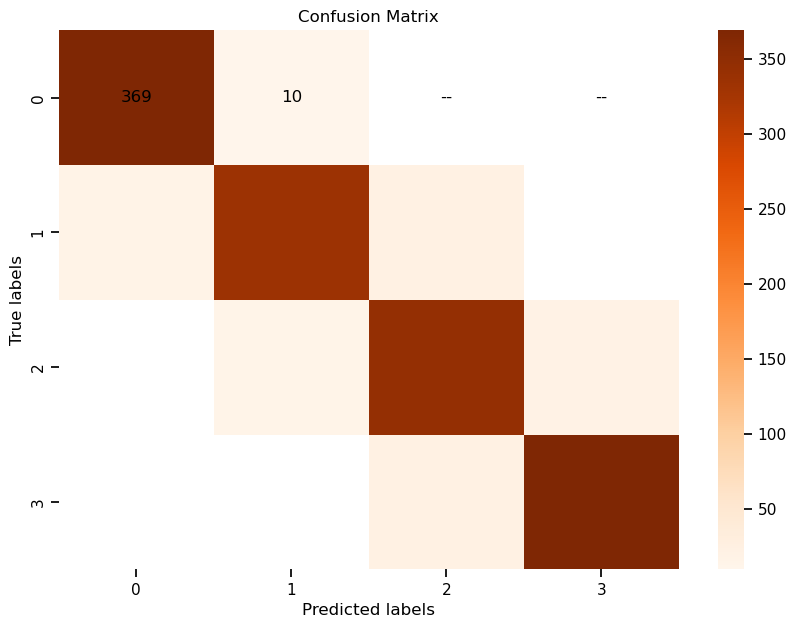

In [67]:
##CM for tuned DT
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y contains the true labels and KNNClassifier.predict(X) contains the predicted labels
cm = confusion_matrix(Y, DTClassifier_Op.predict(X))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g', annot_kws={"color": "black"}, mask=cm==0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

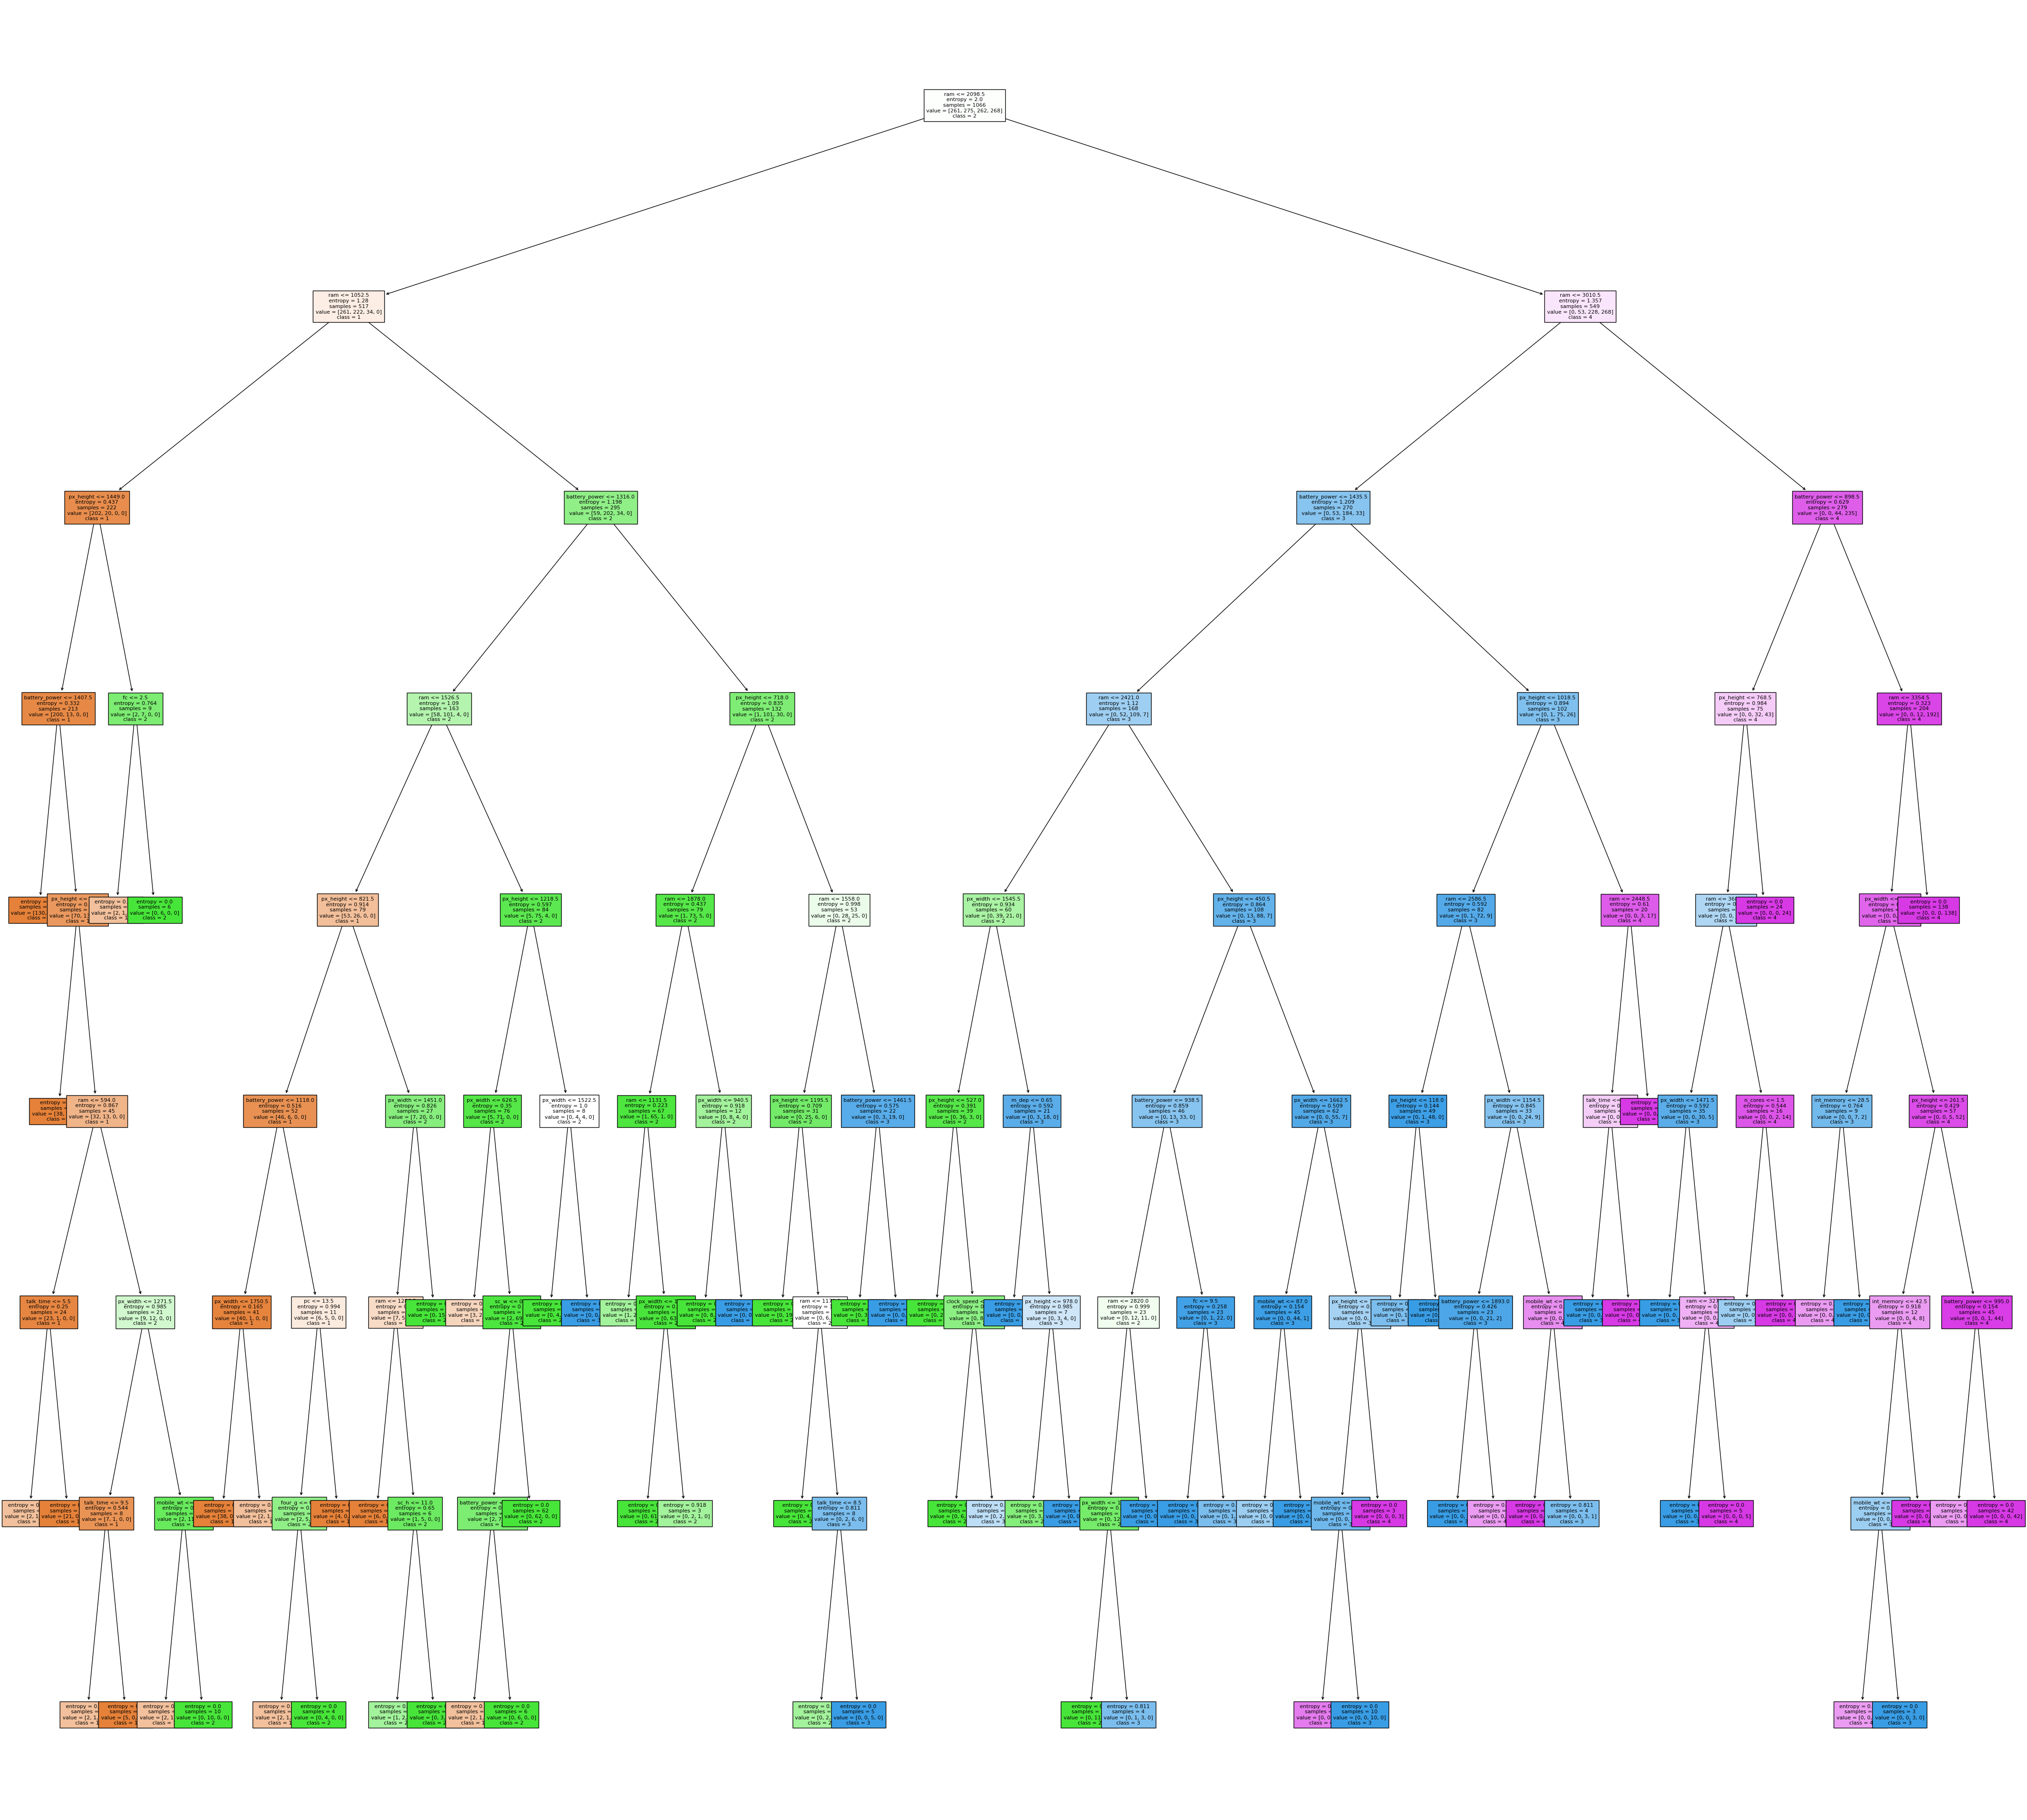

In [81]:
# Plotting the tuned decision tree
feature_names = ['battery_power','blue','clock_speed', 'dual_sim', 'fc' ,
                 'four_g', 'int_memory', 'm_dep','mobile_wt','n_cores',
                 'pc','px_height','px_width','ram','sc_h','sc_w', 'talk_time',
                 'three_g' ,'touch_screen', 'wifi']

target_names = ['1', '2' , '3' , '4']
fig = plt.figure(figsize=(55, 50))

Plot = tree.plot_tree(DTClassifier_Op,  feature_names=feature_names,
                      class_names=target_names, filled=True, fontsize=8)  # Specify the font size here
fig.savefig('BankDTree.png')

In [68]:
#######################defining Model for RF
#######################defining X, Y
X = Df.drop ('price_range', axis=1).values
Y = Df['price_range'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model



X-Train Shape : (1066, 20)
X-Test Shape : (458, 20)
Y-Train Shape : (1066, 1)
Y-Test Shape : (458, 1)


# Defining a Model
####Decision Random Forest
RFClassifier = RandomForestClassifier(n_estimators=100 , max_depth=3)
RFClassifier.fit(X_train , Y_train.ravel())
Y_pred = RFClassifier.predict(X_test)

In [69]:
######Defining a Model
####Decision Random Forest
RFClassifier = RandomForestClassifier(n_estimators=100 , max_depth=7)
RFClassifier.fit(X_train , Y_train.ravel())
Y_pred = RFClassifier.predict(X_test)

In [70]:

print ("Accuracy of Random forest:", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, RFClassifier.predict(X)),'\n')
print ('Random forest.score (X, Y) of Model:', RFClassifier.score(X, Y))
print ("Accuracy of Random forest:", metrics.accuracy_score(Y_test, Y_pred),'\n')



Accuracy of Random forest: 0.8318777292576419 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       379
           1       0.90      0.91      0.91       375
           2       0.90      0.89      0.89       379
           3       0.96      0.96      0.96       391

    accuracy                           0.94      1524
   macro avg       0.93      0.93      0.93      1524
weighted avg       0.94      0.94      0.93      1524
 

Random forest.score (X, Y) of Model: 0.9350393700787402
Accuracy of Random forest: 0.8318777292576419 



In [71]:
from sklearn import tree

In [72]:
#Tunig the Randon forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
RFClassifier_op = RandomForestClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=RFClassifier_op, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Use the best Random Forest model for predictions
Y_pred = best_rf.predict(X_test)

print ("Accuracy of Random forest:", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, best_rf.predict(X)),'\n')
print ('Random forest.score (X, Y) of Model:', best_rf.score(X, Y))
print ("Accuracy of Random forest:", metrics.accuracy_score(Y_test, Y_pred),'\n')

Accuracy of Random forest: 0.8624454148471615 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       379
           1       0.94      0.95      0.94       375
           2       0.94      0.92      0.93       379
           3       0.97      0.98      0.98       391

    accuracy                           0.96      1524
   macro avg       0.96      0.96      0.96      1524
weighted avg       0.96      0.96      0.96      1524
 

Random forest.score (X, Y) of Model: 0.9586614173228346
Accuracy of Random forest: 0.8624454148471615 



In [76]:
grid_search.best_params_


{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [77]:
#CM for tuned RF
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix (Y , best_rf.predict(X))




array([[374,   5,   0,   0],
       [  6, 355,  14,   0],
       [  0,  19, 350,  10],
       [  0,   0,   9, 382]], dtype=int64)

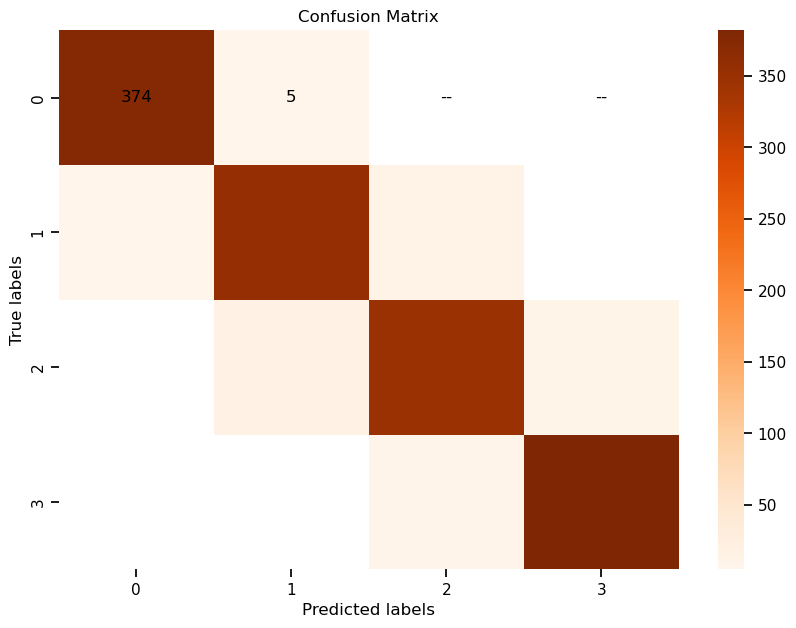

In [78]:
#KNN

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming Y contains the true labels and KNNClassifier.predict(X) contains the predicted labels
cm = confusion_matrix(Y, best_rf.predict(X))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g', annot_kws={"color": "black"}, mask=cm==0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [79]:
#KNN Model
#######################defining Model
#######################defining X, Y
X = Df.drop ('price_range', axis=1).values
Y = Df['price_range'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model



X-Train Shape : (1066, 20)
X-Test Shape : (458, 20)
Y-Train Shape : (1066, 1)
Y-Test Shape : (458, 1)


In [87]:
from sklearn.neighbors import KNeighborsClassifier
######Defining a Model
k = 7
####KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(k)
KNNClassifier.fit(X_train , Y_train.ravel())
Y_pred = KNNClassifier.predict(X_test)


KNN_acc=accuracy_score(Y_pred,Y_test)


print ("Accuracy of KNN :", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, KNNClassifier.predict(X)),'\n')
print ('KNN.score (X, Y) of Model:', KNNClassifier.score(X, Y))
print ("Accuracy of KNN:", metrics.accuracy_score(Y_test, Y_pred),'\n')



Accuracy of KNN : 0.9279475982532751 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       379
           1       0.92      0.95      0.94       375
           2       0.92      0.90      0.91       379
           3       0.95      0.95      0.95       391

    accuracy                           0.94      1524
   macro avg       0.94      0.94      0.94      1524
weighted avg       0.95      0.94      0.94      1524
 

KNN.score (X, Y) of Model: 0.9448818897637795
Accuracy of KNN: 0.9279475982532751 



In [88]:
confusion_matrix (Y , KNNClassifier.predict(X))



array([[369,  10,   0,   0],
       [  6, 357,  12,   0],
       [  0,  19, 342,  18],
       [  0,   0,  19, 372]], dtype=int64)

In [89]:
# Model improvement fingin best K
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': range(1, 50)}
Grid_KN = GridSearchCV(estimator=KNNClassifier,
                       param_grid=parameters, scoring='accuracy', cv=5, verbose=1, n_jobs=1)
Grid_KN.fit(X_train, Y_train.ravel())


Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=7), n_jobs=1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [90]:
Grid_KN.best_params_

{'n_neighbors': 13}

In [93]:
from sklearn.neighbors import KNeighborsClassifier
######Defining Optimized Model
k = 13
####KNeighborsClassifier
KNNClassifier_op = KNeighborsClassifier(k)
KNNClassifier_op.fit(X_train , Y_train.ravel())
Y_pred = KNNClassifier_op.predict(X_test)


KNN_acc=accuracy_score(Y_pred,Y_test)


print ("Accuracy of optimized KNN :", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, KNNClassifier_op.predict(X)),'\n')
print ('optimized KNN.score (X, Y) of Model:', KNNClassifier_op.score(X, Y))
print ("Accuracy of optimized KNN:", metrics.accuracy_score(Y_test, Y_pred),'\n')




Accuracy of optimized KNN : 0.9235807860262009 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       379
           1       0.92      0.93      0.92       375
           2       0.90      0.91      0.91       379
           3       0.97      0.94      0.96       391

    accuracy                           0.94      1524
   macro avg       0.94      0.94      0.94      1524
weighted avg       0.94      0.94      0.94      1524
 

optimized KNN.score (X, Y) of Model: 0.9409448818897638
Accuracy of optimized KNN: 0.9235807860262009 



In [94]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix (Y , KNNClassifier_op.predict(X))



array([[371,   8,   0,   0],
       [ 10, 349,  16,   0],
       [  0,  23, 346,  10],
       [  0,   0,  23, 368]], dtype=int64)

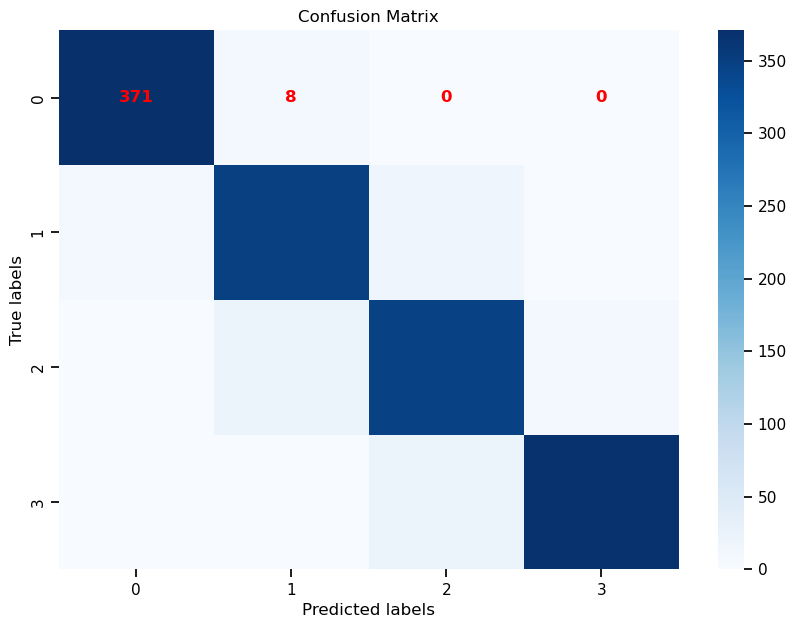

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Assuming Y contains the true labels and KNNClassifier.predict(X) contains the predicted labels
cm = confusion_matrix(Y, KNNClassifier_op.predict(X))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"color": "red", "size": 12, "weight": "bold"})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
#SVM Model
#######################defining Model
#######################defining X, Y
X = Df.drop ('price_range', axis=1).values
Y = Df['price_range'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model



X-Train Shape : (1066, 20)
X-Test Shape : (458, 20)
Y-Train Shape : (1066, 1)
Y-Test Shape : (458, 1)


In [97]:
from sklearn.svm import SVC

SVMClassifier = SVC(kernel='rbf', C=1.0, gamma='scale')
SVMClassifier.fit(X_train , Y_train.ravel())
Y_pred = SVMClassifier.predict(X_test)


SVM_acc=accuracy_score(Y_pred,Y_test)


print ("Accuracy of SVM :", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, SVMClassifier.predict(X)),'\n')
print ('SVM.score (X, Y) of Model:', SVMClassifier.score(X, Y))
print ("Accuracy of SVM:", metrics.accuracy_score(Y_test, Y_pred),'\n')



Accuracy of SVM : 0.9497816593886463 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       379
           1       0.93      0.96      0.94       375
           2       0.95      0.90      0.92       379
           3       0.96      0.97      0.96       391

    accuracy                           0.95      1524
   macro avg       0.95      0.95      0.95      1524
weighted avg       0.95      0.95      0.95      1524
 

SVM.score (X, Y) of Model: 0.9534120734908137
Accuracy of SVM: 0.9497816593886463 



In [98]:
confusion_matrix (Y , SVMClassifier.predict(X))


array([[372,   7,   0,   0],
       [  8, 361,   6,   0],
       [  0,  22, 341,  16],
       [  0,   0,  12, 379]], dtype=int64)

In [99]:
# Define the hyperparameters to tune for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(SVMClassifier, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Make predictions using the best estimator
best_svm_classifier = grid_search.best_estimator_
Y_pred = best_svm_classifier.predict(X_test)

# Calculate the accuracy of the best classifier
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy with best hyperparameters: {accuracy}')

Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy with best hyperparameters: 0.9694323144104804


In [100]:
#SVM Model
#######################defining Model
#######################defining X, Y
X = Df.drop ('price_range', axis=1).values
Y = Df['price_range'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model


best_svm_classifier = SVC(kernel='linear', C=1.0, gamma='scale')
best_svm_classifier.fit(X_train , Y_train.ravel())
Y_pred = best_svm_classifier.predict(X_test)


SVM_acc=accuracy_score(Y_pred,Y_test)


print ("Accuracy of SVM :", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, best_svm_classifier.predict(X)),'\n')
print ('SVM.score (X, Y) of Model:', best_svm_classifier.score(X, Y))
print ("Accuracy of SVM:", metrics.accuracy_score(Y_test, Y_pred),'\n')



X-Train Shape : (1066, 20)
X-Test Shape : (458, 20)
Y-Train Shape : (1066, 1)
Y-Test Shape : (458, 1)
Accuracy of SVM : 0.9694323144104804 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       379
           1       0.98      0.99      0.99       375
           2       0.99      0.98      0.98       379
           3       0.99      1.00      0.99       391

    accuracy                           0.99      1524
   macro avg       0.99      0.99      0.99      1524
weighted avg       0.99      0.99      0.99      1524
 

SVM.score (X, Y) of Model: 0.9901574803149606
Accuracy of SVM: 0.9694323144104804 



In [101]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix (Y , best_svm_classifier.predict(X))



array([[377,   2,   0,   0],
       [  1, 371,   3,   0],
       [  0,   5, 370,   4],
       [  0,   0,   0, 391]], dtype=int64)

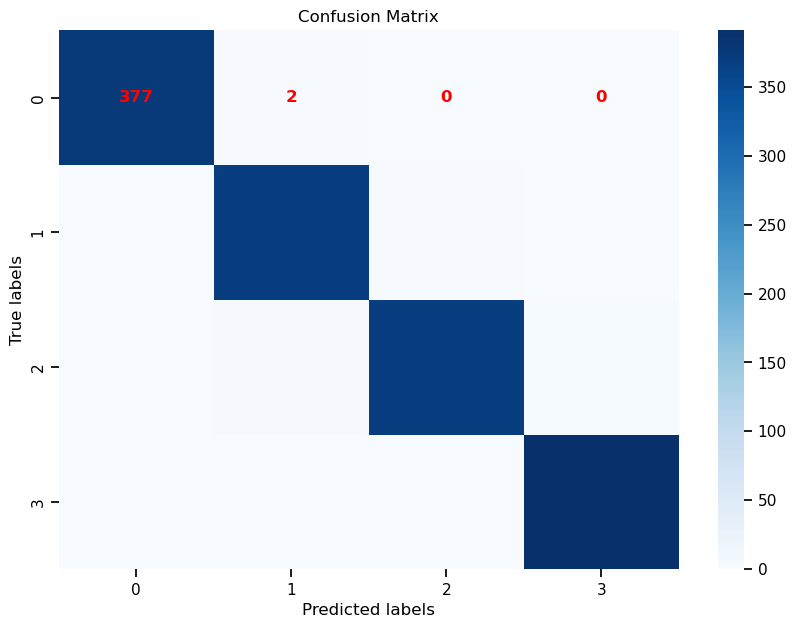

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Assuming Y contains the true labels and KNNClassifier.predict(X) contains the predicted labels
cm = confusion_matrix(Y, best_svm_classifier.predict(X))

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"color": "red", "size": 12, "weight": "bold"})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

LR: 0.624630 (0.049231)
DT: 0.834000 (0.023220)
RF: 0.879261 (0.007898)
KNN: 0.921246 (0.013171)
SVM: 0.946186 (0.011709)


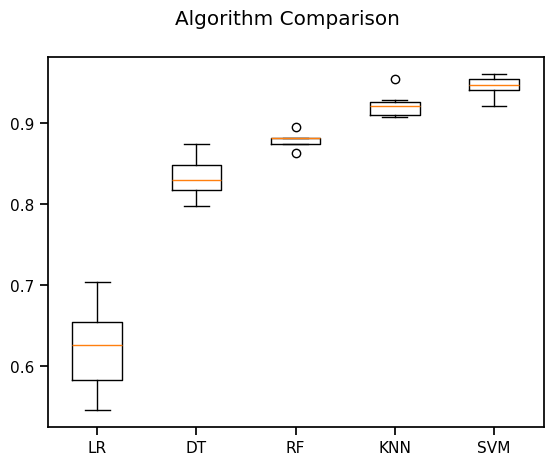

In [103]:
#finding the best Model
from sklearn import model_selection

models = []

models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM',  SVC()  ))




# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=False)
    #kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [104]:

#SVM Model
#######################defining Model
#######################defining X, Y
X = Df.drop ('price_range', axis=1)
Y = Df['price_range'].values.reshape (-1,1)
#######################defining Train and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.3 , random_state=0)
print ( 'X-Train Shape :' ,X_train.shape)
print ( 'X-Test Shape :' ,X_test.shape)
print ( 'Y-Train Shape :' ,Y_train.shape)
print ( 'Y-Test Shape :' ,Y_test.shape)
######Defining a Model

######Defining a Model


best_svm_classifier = SVC(kernel='linear', C=1.0, gamma='scale')
best_svm_classifier.fit(X_train , Y_train.ravel())
Y_pred = best_svm_classifier.predict(X_test)


SVM_acc=accuracy_score(Y_pred,Y_test)


print ("Accuracy of SVM :", metrics.accuracy_score(Y_test, Y_pred),'\n')
print (classification_report(Y, best_svm_classifier.predict(X)),'\n')
print ('SVM.score (X, Y) of Model:', best_svm_classifier.score(X, Y))
print ("Accuracy of SVM:", metrics.accuracy_score(Y_test, Y_pred),'\n')

X_test

X-Train Shape : (1066, 20)
X-Test Shape : (458, 20)
Y-Train Shape : (1066, 1)
Y-Test Shape : (458, 1)
Accuracy of SVM : 0.9694323144104804 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       379
           1       0.98      0.99      0.99       375
           2       0.99      0.98      0.98       379
           3       0.99      1.00      0.99       391

    accuracy                           0.99      1524
   macro avg       0.99      0.99      0.99      1524
weighted avg       0.99      0.99      0.99      1524
 

SVM.score (X, Y) of Model: 0.9901574803149606
Accuracy of SVM: 0.9694323144104804 



battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1794           1494     0          1.9         0   2       1          47   
686            1527     0          2.7         0  10       1          60   
14             1866     0          0.5         0  13       1          52   
526             535     1          0.5         1   8       1          54   
636             570     1          0.5         1   2       0           9   
...             ...   ...          ...       ...  ..     ...         ...   
1977           1379     0          1.1         1   1       1          18   
1313            730     1          0.5         1   3       1          27   
1456           1404     0          2.1         0  16       0          44   
1216           1158     0          0.7         1   1       1          29   
1810            594     1          2.6         0   1       0          27   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1794    0.4        129        2   9        207      1177  3202    13     1   
686     0.1        154        5  14        526      1116  2078     5     3   
14      0.7        185        1  17        356       563   373    14     9   
526     0.5        145        8  15        710       939  2674    14     8   
636     0.3        111        7   5       1331      1917  3663    14    10   
...     ...        ...      ...  ..        ...       ...   ...   ...   ...   
1977    0.2        129        2  16        838       885  2358    10     5   
1313    0.1        112        5  10         62       846  3623     9     4   
1456    0.9        151        1  20       1703      1880  1196    10     6   
1216    0.7        123        2  20        311      1796  1542    17     9   
1810    0.1        196        5   2        407       528   708    17     5   

      talk_time  three_g  touch_screen  wifi  
1794         14        1             0     0  
686          11        1             1     1  
14            3        1             0     1  
526          10        1             0     0  
636          14        0             0     0  
...         ...      ...           ...   ...  
1977         15        1             1     0  
1313         15        1             1     0  
1456          5        0             0     1  
1216         15        1             0     1  
1810         17        0             1     1  

[458 rows x 20 columns]

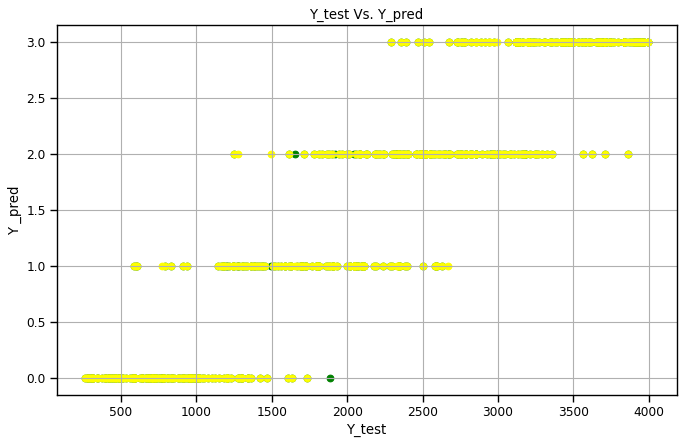

In [106]:

A = X_test.ram
B = Y_test
C = X_test.ram
D = Y_pred
plt.figure(figsize=(10, 6), dpi = 80)
plt.scatter( A,B,  color = 'green')
plt.scatter( C,D,  color = 'yellow')
plt.title('Y_test Vs. Y_pred')
plt.grid()
plt.xlabel ("Y_test")
plt.ylabel ('Y _pred')
plt.show()

In [107]:
Df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
2               563     1          0.5         1   2       1          41   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
6              1821     0          1.7         0   4       1          10   
...             ...   ...          ...       ...  ..     ...         ...   
1992            674     1          2.9         1   1       0          21   
1994            858     0          2.2         0   1       0          50   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
2       0.9        145        5  ...       1263      1716  2603    11     2   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
6       0.8        139        8  ...        381      1018  3220    13     8   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1992    0.2        198        3  ...        576      1809  1180     6     3   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
2             9        1             1     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
6            18        1             0     1            3  
...         ...      ...           ...   ...          ...  
1992          4        1             1     1            0  
1994          3        1             1     0            3  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[1524 rows x 21 columns]

In [108]:
#importing Test Data Set

In [109]:
Data_Test = pd.read_csv('mobileprice_test.csv', encoding=('unicode-escape'))
Data_Test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [110]:
Df_Test= pd.DataFrame (Data_Test)
Df_Test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [111]:
cols1 = ['battery_power', 'clock_speed', 'fc', 'm_dep', 'mobile_wt', 'px_height', 'px_width']

for col in cols1:
    Df_Test = Df_Test[Df_Test[col]!= 0]
Df_Test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
990   991           1807     0          1.2         0   4       0          37   
991   992           1797     1          2.6         0   4       0          42   
993   994            567     1          2.7         1  14       1          56   
997   998           1185     0          1.4         0   1       1           8   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
990    0.8        162  ...  11        246       932  2741     7     1   
991    0.6        174  ...  20         57      1169  3359    16     6   
993    0.4        165  ...  17        555      1290   336     7     6   
997    0.5         80  ...  12        477       825  1223     5     0   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
990          9        1             1     1  
991         18        1             1     1  
993          7        1             1     1  
997         14        1             0     0  
999          3        1             0     1  

[789 rows x 21 columns]

In [112]:
Df_Test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [113]:
Df_Test.describe()

id  battery_power        blue  clock_speed    dual_sim  \
count   789.000000     789.000000  789.000000   789.000000  789.000000   
mean    500.795944    1247.448669    0.513308     1.553739    0.525982   
std     289.860473     432.421016    0.500140     0.826298    0.499641   
min       1.000000     500.000000    0.000000     0.500000    0.000000   
25%     245.000000     895.000000    0.000000     0.700000    0.000000   
50%     506.000000    1240.000000    1.000000     1.500000    1.000000   
75%     753.000000    1629.000000    1.000000     2.300000    1.000000   
max    1000.000000    1999.000000    1.000000     3.000000    1.000000   

               fc      four_g  int_memory       m_dep   mobile_wt  ...  \
count  789.000000  789.000000  789.000000  789.000000  789.000000  ...   
mean     5.811153    0.496831   33.233207    0.516096  140.244613  ...   
std      4.258295    0.500307   17.945316    0.281551   34.678761  ...   
min      1.000000    0.000000    2.000000    0.100000   80.000000  ...   
25%      2.000000    0.000000   18.000000    0.300000  111.000000  ...   
50%      5.000000    0.000000   33.000000    0.500000  140.000000  ...   
75%      9.000000    1.000000   48.000000    0.800000  171.000000  ...   
max     19.000000    1.000000   64.000000    1.000000  200.000000  ...   

               pc    px_height     px_width          ram        sc_h  \
count  789.000000   789.000000   789.000000   789.000000  789.000000   
mean    11.647655   626.370089  1248.783270  2127.248416   12.044360   
std      5.334502   437.881462   437.750766  1090.354216    4.293107   
min      2.000000     2.000000   502.000000   263.000000    5.000000   
25%      7.000000   257.000000   853.000000  1231.000000    8.000000   
50%     12.000000   565.000000  1260.000000  2138.000000   12.000000   
75%     16.000000   900.000000  1644.000000  3034.000000   16.000000   
max     20.000000  1907.000000  1998.000000  3989.000000   19.000000   

             sc_w   talk_time     three_g  touch_screen        wifi  
count  789.000000  789.000000  789.000000    789.000000  789.000000  
mean     5.288973   10.917617    0.751584      0.500634    0.503169  
std      4.231276    5.387950    0.432368      0.500317    0.500307  
min      0.000000    2.000000    0.000000      0.000000    0.000000  
25%      2.000000    6.000000    1.000000      0.000000    0.000000  
50%      5.000000   11.000000    1.000000      1.000000    1.000000  
75%      8.000000   15.000000    1.000000      1.000000    1.000000  
max     18.000000   20.000000    1.000000      1.000000    1.000000  

[8 rows x 21 columns]

In [114]:
Df_Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             789 non-null    int64  
 1   battery_power  789 non-null    int64  
 2   blue           789 non-null    int64  
 3   clock_speed    789 non-null    float64
 4   dual_sim       789 non-null    int64  
 5   fc             789 non-null    int64  
 6   four_g         789 non-null    int64  
 7   int_memory     789 non-null    int64  
 8   m_dep          789 non-null    float64
 9   mobile_wt      789 non-null    int64  
 10  n_cores        789 non-null    int64  
 11  pc             789 non-null    int64  
 12  px_height      789 non-null    int64  
 13  px_width       789 non-null    int64  
 14  ram            789 non-null    int64  
 15  sc_h           789 non-null    int64  
 16  sc_w           789 non-null    int64  
 17  talk_time      789 non-null    int64  
 18  three_g        

In [115]:
# Dropping the 'id' column from the test dataset
Df_Test = Df_Test.drop(['id'], axis=1)
Df_Test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
990           1807     0          1.2         0   4       0          37   
991           1797     1          2.6         0   4       0          42   
993            567     1          2.7         1  14       1          56   
997           1185     0          1.4         0   1       1           8   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  16        226      1412  3476    12     7   
1      0.8        191        5  12        746       857  3895     6     0   
2      0.9        186        3   4       1270      1366  2396    17    10   
3      0.5         96        8  20        295      1752  3893    10     0   
4      0.5        108        6  18        749       810  1773    15     8   
..     ...        ...      ...  ..        ...       ...   ...   ...   ...   
990    0.8        162        1  11        246       932  2741     7     1   
991    0.6        174        3  20         57      1169  3359    16     6   
993    0.4        165        8  17        555      1290   336     7     6   
997    0.5         80        1  12        477       825  1223     5     0   
999    0.1        140        6  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
990          9        1             1     1  
991         18        1             1     1  
993          7        1             1     1  
997         14        1             0     0  
999          3        1             0     1  

[789 rows x 20 columns]

In [116]:
Df_Test.insert(20, 'price_range', 0)
print(Df_Test)

     battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
990           1807     0          1.2         0   4       0          37   
991           1797     1          2.6         0   4       0          42   
993            567     1          2.7         1  14       1          56   
997           1185     0          1.4         0   1       1           8   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193

In [117]:
Df_Test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0             1043     1          1.8         1  14       0           5   
1              841     1          0.5         1   4       1          61   
2             1807     1          2.8         0   1       0          27   
3             1546     0          0.5         1  18       1          25   
4             1434     0          1.4         0  11       1          49   
..             ...   ...          ...       ...  ..     ...         ...   
990           1807     0          1.2         0   4       0          37   
991           1797     1          2.6         0   4       0          42   
993            567     1          2.7         1  14       1          56   
997           1185     0          1.4         0   1       1           8   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193        3  ...        226      1412  3476    12     7   
1      0.8        191        5  ...        746       857  3895     6     0   
2      0.9        186        3  ...       1270      1366  2396    17    10   
3      0.5         96        8  ...        295      1752  3893    10     0   
4      0.5        108        6  ...        749       810  1773    15     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
990    0.8        162        1  ...        246       932  2741     7     1   
991    0.6        174        3  ...         57      1169  3359    16     6   
993    0.4        165        8  ...        555      1290   336     7     6   
997    0.5         80        1  ...        477       825  1223     5     0   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0            2        0             1     0            0  
1            7        1             0     0            0  
2           10        0             1     1            0  
3            7        1             1     0            0  
4            7        1             0     1            0  
..         ...      ...           ...   ...          ...  
990          9        1             1     1            0  
991         18        1             1     1            0  
993          7        1             1     1            0  
997         14        1             0     0            0  
999          3        1             0     1            0  

[789 rows x 21 columns]

In [118]:
Df_Total = Df._append(Df_Test)
Df_Total

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0              842     0          2.2         0   1       0           7   
2              563     1          0.5         1   2       1          41   
4             1821     1          1.2         0  13       1          44   
5             1859     0          0.5         1   3       0          22   
6             1821     0          1.7         0   4       1          10   
..             ...   ...          ...       ...  ..     ...         ...   
990           1807     0          1.2         0   4       0          37   
991           1797     1          2.6         0   4       0          42   
993            567     1          2.7         1  14       1          56   
997           1185     0          1.4         0   1       1           8   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.6        188        2  ...         20       756  2549     9     7   
2      0.9        145        5  ...       1263      1716  2603    11     2   
4      0.6        141        2  ...       1208      1212  1411     8     2   
5      0.7        164        1  ...       1004      1654  1067    17     1   
6      0.8        139        8  ...        381      1018  3220    13     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
990    0.8        162        1  ...        246       932  2741     7     1   
991    0.6        174        3  ...         57      1169  3359    16     6   
993    0.4        165        8  ...        555      1290   336     7     6   
997    0.5         80        1  ...        477       825  1223     5     0   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0           19        0             0     1            1  
2            9        1             1     0            2  
4           15        1             1     0            1  
5           10        1             0     0            1  
6           18        1             0     1            3  
..         ...      ...           ...   ...          ...  
990          9        1             1     1            0  
991         18        1             1     1            0  
993          7        1             1     1            0  
997         14        1             0     0            0  
999          3        1             0     1            0  

[2313 rows x 21 columns]

In [119]:
#SVM Model for total

import numpy as np

Train = Df_Total.iloc[:2000]
Test = Df_Total.iloc[2000:]


In [120]:
#SVM Model for total

# Defining Train and test sets
X_Train = Train.drop ('price_range', axis=1).values
Y_Train = Train['price_range'].values.reshape (-1,1)
X_Test = Test.drop ('price_range', axis=1).values
Y_Test= Test['price_range'].values.reshape (-1,1)

print(X_Train.shape)
print(Y_Train.shape)
print(X_Test.shape)
print(Y_Test.shape)



(2000, 20)
(2000, 1)
(313, 20)
(313, 1)


In [121]:
# Create and fit the Linear Regression modelModel_in


best_svm_classifier = SVC(kernel='linear', C=1.0, gamma='scale')
best_svm_classifier.fit(X_Train , Y_Train.ravel())
Y_Pred = best_svm_classifier.predict(X_Test)


Y_Pred


array([2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 3, 0, 0, 0, 3, 2,
       2, 0, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0,
       0, 2, 0, 3, 0, 0, 2, 0, 3, 0, 0, 2, 3, 0, 3, 0, 0, 2, 3, 2, 0, 2,
       0, 0, 3, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0,
       0, 0, 2, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 3, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       2, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 3, 2, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 3,
       3, 0, 2, 0, 1, 0, 0, 3, 0, 2, 0, 3, 0, 0, 0,

In [122]:
Df1= pd.DataFrame (Y_Pred)

Df1

0
0    2
1    0
2    0
3    3
4    0
..  ..
308  2
309  3
310  0
311  0
312  2

[313 rows x 1 columns]

In [123]:
Df2 = pd.DataFrame (X_Test)

Df2.insert( 20, 'Y_Test', Y_Test)
Df2.insert (21, 'Y_Pred', Y_Pred)
Df2.reset_index(drop=True, inplace=True)


Df2

0    1    2    3     4    5     6    7      8    9  ...      12  \
0     520.0  0.0  0.6  1.0   2.0  1.0  44.0  0.6  127.0  3.0  ...   914.0   
1     942.0  1.0  2.5  0.0   6.0  0.0  11.0  0.5  196.0  5.0  ...  1310.0   
2     558.0  1.0  2.2  0.0   5.0  1.0  24.0  0.1  169.0  4.0  ...   804.0   
3    1733.0  0.0  1.6  1.0   9.0  0.0  56.0  0.5  111.0  6.0  ...  1649.0   
4     880.0  0.0  0.5  1.0   7.0  1.0  32.0  0.5  141.0  4.0  ...   739.0   
..      ...  ...  ...  ...   ...  ...   ...  ...    ...  ...  ...     ...   
308  1807.0  0.0  1.2  0.0   4.0  0.0  37.0  0.8  162.0  1.0  ...   932.0   
309  1797.0  1.0  2.6  0.0   4.0  0.0  42.0  0.6  174.0  3.0  ...  1169.0   
310   567.0  1.0  2.7  1.0  14.0  1.0  56.0  0.4  165.0  8.0  ...  1290.0   
311  1185.0  0.0  1.4  0.0   1.0  1.0   8.0  0.5   80.0  1.0  ...   825.0   
312  1270.0  1.0  0.5  0.0   4.0  1.0  35.0  0.1  140.0  6.0  ...   608.0   

         13    14    15    16   17   18   19  Y_Test  Y_Pred  
0    3616.0  15.0   4.0  18.0  1.0  0.0  0.0       0       2  
1    1783.0   7.0   5.0  18.0  1.0  1.0  1.0       0       0  
2     482.0  12.0   4.0   4.0  1.0  1.0  0.0       0       0  
3    3352.0   6.0   5.0   9.0  1.0  0.0  0.0       0       3  
4    1141.0  19.0  17.0  20.0  1.0  1.0  1.0       0       0  
..      ...   ...   ...   ...  ...  ...  ...     ...     ...  
308  2741.0   7.0   1.0   9.0  1.0  1.0  1.0       0       2  
309  3359.0  16.0   6.0  18.0  1.0  1.0  1.0       0       3  
310   336.0   7.0   6.0   7.0  1.0  1.0  1.0       0       0  
311  1223.0   5.0   0.0  14.0  1.0  0.0  0.0       0       0  
312  2828.0   9.0   2.0   3.0  1.0  0.0  1.0       0       2  

[313 rows x 22 columns]

In [124]:
Copmare = pd.DataFrame ({'Atcual': Df2 ['Y_Test'], 'Predicti':  Df2['Y_Pred']})
Copmare.reset_index (drop=True, inplace = True)
Copmare

Atcual  Predicti
0         0         2
1         0         0
2         0         0
3         0         3
4         0         0
..      ...       ...
308       0         2
309       0         3
310       0         0
311       0         0
312       0         2

[313 rows x 2 columns]

In [125]:
Y_Pred_Df= pd.DataFrame (Y_Pred)
Y_Pred_Df

0
0    2
1    0
2    0
3    3
4    0
..  ..
308  2
309  3
310  0
311  0
312  2

[313 rows x 1 columns]

In [126]:
Df_Total

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0              842     0          2.2         0   1       0           7   
2              563     1          0.5         1   2       1          41   
4             1821     1          1.2         0  13       1          44   
5             1859     0          0.5         1   3       0          22   
6             1821     0          1.7         0   4       1          10   
..             ...   ...          ...       ...  ..     ...         ...   
990           1807     0          1.2         0   4       0          37   
991           1797     1          2.6         0   4       0          42   
993            567     1          2.7         1  14       1          56   
997           1185     0          1.4         0   1       1           8   
999           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0      0.6        188        2  ...         20       756  2549     9     7   
2      0.9        145        5  ...       1263      1716  2603    11     2   
4      0.6        141        2  ...       1208      1212  1411     8     2   
5      0.7        164        1  ...       1004      1654  1067    17     1   
6      0.8        139        8  ...        381      1018  3220    13     8   
..     ...        ...      ...  ...        ...       ...   ...   ...   ...   
990    0.8        162        1  ...        246       932  2741     7     1   
991    0.6        174        3  ...         57      1169  3359    16     6   
993    0.4        165        8  ...        555      1290   336     7     6   
997    0.5         80        1  ...        477       825  1223     5     0   
999    0.1        140        6  ...        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  price_range  
0           19        0             0     1            1  
2            9        1             1     0            2  
4           15        1             1     0            1  
5           10        1             0     0            1  
6           18        1             0     1            3  
..         ...      ...           ...   ...          ...  
990          9        1             1     1            0  
991         18        1             1     1            0  
993          7        1             1     1            0  
997         14        1             0     0            0  
999          3        1             0     1            0  

[2313 rows x 21 columns]